# NBaIoT SOM+Algos CLASSIFY

## Device 1

- Training on device 1 (using both Mirai and Gafgyt).
- Testing on device 1 (both Mirai & Gafgyt)

# Imports

In [1]:
# import sys
import sys
import os
import random
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

In [2]:
print(os.path.dirname(os.getcwd()))
sys.path.append(os.path.dirname(os.getcwd()))

/home/huunoi/Projects/research/papers/SOM-KNN-IoT_AD


In [3]:
from utils.config import data_path, nbaiot_1K_data_path, nbaiot_10K_data_path, nbaiot_5K_data_path, \
    nbaiot_20K_data_path, nbaiot_data_path, dn_nbaiot
from utils.datasets import get_data, get_data_d3

In [4]:
# from pyscripts.main_som import main, process_train_test_partial, som_test, load_common_data, load_data_test
from pyscripts.main_som import process_train_partial, som_test, load_data_test

2023-02-17 10:52:21.402014: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


## Set folder and gafgyt params

In [5]:
choose_folder = nbaiot_data_path

In [6]:
print(choose_folder)

/home/huunoi/Projects/research/data/nbaiot


## Set training and testing devices

In [7]:
train_index = 1

In [8]:
train_index

1

# 1. Load data and preprocess data

In [9]:
# Load data on device 1
data_benign, target_benign, data_gafgyt, target_gafgyt, data_mirai, target_mirai = get_data(choose_folder=choose_folder, choose_index=train_index)

In [10]:
(data_benign.shape, target_benign.shape), (data_gafgyt.shape, target_gafgyt.shape), (data_mirai.shape, target_mirai.shape)

(((49548, 115), (49548,)),
 ((316650, 115), (316650,)),
 ((652100, 115), (652100,)))

## Split data

In [11]:
data_benign_train, data_benign_test, target_benign_train, target_benign_test = train_test_split(data_benign, target_benign, test_size=0.3, shuffle=True, random_state=1)

data_gafgyt_train, data_gafgyt_test, target_gafgyt_train, target_gafgyt_test = train_test_split(data_gafgyt, target_gafgyt, test_size=0.3, shuffle=True, random_state=1)

data_mirai_train, data_mirai_test, target_mirai_train, target_mirai_test = train_test_split(data_mirai, target_mirai, test_size=0.3, shuffle=True, random_state=1)

In [12]:
data_benign_train.shape, data_benign_test.shape, target_benign_train.shape, target_benign_test.shape

((34683, 115), (14865, 115), (34683,), (14865,))

In [13]:
data_gafgyt_train.shape, data_gafgyt_test.shape, target_gafgyt_train.shape, target_gafgyt_test.shape

((221655, 115), (94995, 115), (221655,), (94995,))

In [14]:
data_mirai_train.shape, data_mirai_test.shape, target_mirai_train.shape, target_mirai_test.shape

((456470, 115), (195630, 115), (456470,), (195630,))

## Set ratio

In [15]:
benign_size = data_benign_train.shape[0]
print(benign_size)

34683


In [16]:
# ratio_001 = int(0.01*benign_size)
# ratio_01 = int(0.1*benign_size)
# ratio_05 = int(0.5*benign_size)
ratio_1 = int(1.0*benign_size)
# ratio_2 = int(2.0*benign_size)
# ratio_5 = int(5.0*benign_size)

## Get train data of benign and gafgyt by ratio

In [17]:
# train 0.01
# data_gafgyt_001, _, target_gafgyt_001, _ = train_test_split(data_gafgyt_train, target_gafgyt_train, train_size=ratio_001, shuffle=True, random_state = 1)

# train 0.1
# data_gafgyt_01, _, target_gafgyt_01, _ = train_test_split(data_gafgyt_train, target_gafgyt_train, train_size=ratio_01, shuffle=True, random_state = 1)

# # train 0.5
# data_gafgyt_05, _, target_gafgyt_05, _ = train_test_split(data_gafgyt_train, target_gafgyt_train, train_size=ratio_05, shuffle=True, random_state = 1)

# train 1.0
data_gafgyt_1, _, target_gafgyt_1, _ = train_test_split(data_gafgyt_train, target_gafgyt_train, train_size=ratio_1, shuffle=True, random_state = 1)

# # train 2.0
# data_gafgyt_2, _, target_gafgyt_2, _ = train_test_split(data_gafgyt_train, target_gafgyt_train, train_size=ratio_2, shuffle=True, random_state = 1)

# train 5.0
# data_gafgyt_5, _, target_gafgyt_5, _ = train_test_split(data_gafgyt_train, target_gafgyt_train, train_size=ratio_5, shuffle=True, random_state = 1)

In [18]:
# print(data_gafgyt_001.shape, target_gafgyt_001.shape)
# print(data_gafgyt_01.shape, target_gafgyt_01.shape)
# print(data_gafgyt_05.shape, target_gafgyt_05.shape)
print(data_gafgyt_1.shape, target_gafgyt_1.shape)
# print(data_gafgyt_2.shape, target_gafgyt_2.shape)
# print(data_gafgyt_5.shape, target_gafgyt_5.shape)

(34683, 115) (34683,)


In [19]:
# 0.01
# X_train_gafgyt_001 = np.vstack([data_benign_train, data_gafgyt_001])
# y_train_gafgyt_001 = np.hstack([target_benign_train, target_gafgyt_001])

# 0.1
# X_train_gafgyt_01 = np.vstack([data_benign_train, data_gafgyt_01])
# y_train_gafgyt_01 = np.hstack([target_benign_train, target_gafgyt_01])

# # 0.5
# X_train_gafgyt_05 = np.vstack([data_benign_train, data_gafgyt_05])
# y_train_gafgyt_05 = np.hstack([target_benign_train, target_gafgyt_05])

# 1.0
X_train_gafgyt_1 = np.vstack([data_benign_train, data_gafgyt_1])
y_train_gafgyt_1 = np.hstack([target_benign_train, target_gafgyt_1])

# # 2.0
# X_train_gafgyt_2 = np.vstack([data_benign_train, data_gafgyt_2])
# y_train_gafgyt_2 = np.hstack([target_benign_train, target_gafgyt_2])

# 5.0
# X_train_gafgyt_5 = np.vstack([data_benign_train, data_gafgyt_5])
# y_train_gafgyt_5 = np.hstack([target_benign_train, target_gafgyt_5])

In [20]:
# print(X_train_gafgyt_001.shape, y_train_gafgyt_001.shape)
# print(X_train_gafgyt_01.shape, y_train_gafgyt_01.shape)
# print(X_train_gafgyt_05.shape, y_train_gafgyt_05.shape)
print(X_train_gafgyt_1.shape, y_train_gafgyt_1.shape)
# print(X_train_gafgyt_2.shape, y_train_gafgyt_2.shape)
# print(X_train_gafgyt_5.shape, y_train_gafgyt_5.shape)

(69366, 115) (69366,)


## Get train data of benign and Mirai by ratio

In [21]:
# train 0.01
# data_mirai_001, _, target_mirai_001, _ = train_test_split(data_mirai_train, target_mirai_train, train_size=ratio_001, shuffle=True, random_state = 1)

# train 0.1
# data_mirai_01, _, target_mirai_01, _ = train_test_split(data_mirai_train, target_mirai_train, train_size=ratio_01, shuffle=True, random_state = 1)

# # train 0.5
# data_mirai_05, _, target_mirai_05, _ = train_test_split(data_mirai_train, target_mirai_train, train_size=ratio_05, shuffle=True, random_state = 1)

# train 1.0
data_mirai_1, _, target_mirai_1, _ = train_test_split(data_mirai_train, target_mirai_train, train_size=ratio_1, shuffle=True, random_state = 1)

# # train 2.0
# data_mirai_2, _, target_mirai_2, _ = train_test_split(data_mirai_train, target_mirai_train, train_size=ratio_2, shuffle=True, random_state = 1)

# train 5.0
# data_mirai_5, _, target_mirai_5, _ = train_test_split(data_mirai_train, target_mirai_train, train_size=ratio_5, shuffle=True, random_state = 1)

In [22]:
# print(data_mirai_001.shape, target_mirai_001.shape)
# print(data_mirai_01.shape, target_mirai_01.shape)
# print(data_mirai_05.shape, target_mirai_05.shape)
print(data_mirai_1.shape, target_mirai_1.shape)
# print(data_mirai_2.shape, target_mirai_2.shape)
# print(data_mirai_5.shape, target_mirai_5.shape)

(34683, 115) (34683,)


In [23]:
# 0.01
# X_train_mirai_001 = np.vstack([data_benign_train, data_mirai_001])
# y_train_mirai_001 = np.hstack([target_benign_train, target_mirai_001])

# 0.1
# X_train_mirai_01 = np.vstack([data_benign_train, data_mirai_01])
# y_train_mirai_01 = np.hstack([target_benign_train, target_mirai_01])

# # 0.5
# X_train_mirai_05 = np.vstack([data_benign_train, data_mirai_05])
# y_train_mirai_05 = np.hstack([target_benign_train, target_mirai_05])

# 1.0
X_train_mirai_1 = np.vstack([data_benign_train, data_mirai_1])
y_train_mirai_1 = np.hstack([target_benign_train, target_mirai_1])

# # 2.0
# X_train_mirai_2 = np.vstack([data_benign_train, data_mirai_2])
# y_train_mirai_2 = np.hstack([target_benign_train, target_mirai_2])

# 5.0
# X_train_mirai_5 = np.vstack([data_benign_train, data_mirai_5])
# y_train_mirai_5 = np.hstack([target_benign_train, target_mirai_5])

In [24]:
# print(X_train_mirai_001.shape, y_train_mirai_001.shape)
# print(X_train_mirai_01.shape, y_train_mirai_01.shape)
# print(X_train_mirai_05.shape, y_train_mirai_05.shape)
print(X_train_mirai_1.shape, y_train_mirai_1.shape)
# print(X_train_mirai_2.shape, y_train_mirai_2.shape)
# print(X_train_mirai_5.shape, y_train_mirai_5.shape)

(69366, 115) (69366,)


## Get test data

### Gafgyt

In [25]:
X_test_gafgyt = np.vstack([data_benign_test, data_gafgyt_test])
y_test_gafgyt = np.hstack([target_benign_test, target_gafgyt_test])
print(X_test_gafgyt.shape, y_test_gafgyt.shape)

(109860, 115) (109860,)


In [26]:
data_benign_test.shape, data_gafgyt_test.shape, target_benign_test.shape, target_gafgyt_test.shape

((14865, 115), (94995, 115), (14865,), (94995,))

## Mirai

In [27]:
X_test_mirai = np.vstack([data_benign_test, data_mirai_test])
y_test_mirai = np.hstack([target_benign_test, target_mirai_test])
print(X_test_mirai.shape, y_test_mirai.shape)

(210495, 115) (210495,)


In [28]:
X_test_mirai, _ ,y_test_mirai, _ = train_test_split(X_test_mirai, y_test_mirai, train_size=0.7, shuffle=True, random_state=1)

In [29]:
print(X_test_mirai.shape, y_test_mirai.shape)

(147346, 115) (147346,)


# 2. SOM train and test

## 2.1. Train gafgyt

## 2.1.1. Rand

In [ ]:
# som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_gafgyt_1, 
#                                                                  y_train=y_train_gafgyt_1, 
#                                                                  algo='rand')

### Test on the same device

#### Test on gafgyt

In [ ]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = False)

In [ ]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = True)

#### Test on Mirai

In [ ]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_mirai, y_test=y_test_mirai, using_knn = False)

In [ ]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_mirai, y_test=y_test_mirai, using_knn = True)

## 2.1.2. TPE

### Train

In [ ]:
# som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_gafgyt_1, 
#                                                                  y_train=y_train_gafgyt_1, algo='tpe')

### Test on first device

#### Test on gafgyt

In [ ]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = False)

In [ ]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = True)

#### Test on Mirai

In [ ]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_mirai, y_test=y_test_mirai, using_knn = False)

In [ ]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_mirai, y_test=y_test_mirai, using_knn = True)


## 2.1.3. ATPE

### Train

In [30]:
som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_gafgyt_1, 
                                                                 y_train=y_train_gafgyt_1, algo='atpe')

--------------Training and testing in the same device----------------
(69366, 115) (69366,)
------------Scale data-----------------
(69366, 115) (69366,)
X_train_scaled
[[ 3.29612709e-03  1.21268756e-01  0.00000000e+00 ...  9.73875109e-18
   5.68714750e-30  1.94359005e-13]
 [ 3.29612709e-03  1.16513119e-01  0.00000000e+00 ...  1.74196825e-17
  -5.33030687e-34  0.00000000e+00]
 [ 6.58594153e-03  1.21268756e-01  1.06290987e-17 ...  9.73875109e-18
   1.68012462e-33  5.75224125e-17]
 ...
 [ 3.29612758e-03  7.13345701e-02  1.54319329e-09 ...  4.85741148e-18
  -1.04821934e-33 -7.19848165e-17]
 [ 9.85861840e-03  1.21268756e-01  2.12581974e-17 ...  8.70984127e-18
  -3.30077580e-36  0.00000000e+00]
 [ 1.31838629e-02  1.21268756e-01  1.06290987e-17 ...  2.31624350e-16
   1.06308770e-27  1.49859300e-12]]
---------Normalize data--------------
(69366, 115) (69366,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM------------------------------

### Test on the same device

#### Test on gafgyt

Shape:  (109860, 115) (109860,)
----------------------Test is starting----------------------
Scale data
Shape:  (109860, 115) (109860,)
Normalize data
Shape:  (109860, 115) (109860,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           0      0.984     0.997     0.990     14865
           1      1.000     0.997     0.998     94995

    accuracy                          0.997    109860
   macro avg      0.992     0.997     0.994    109860
weighted avg      0.997     0.997     0.997    109860



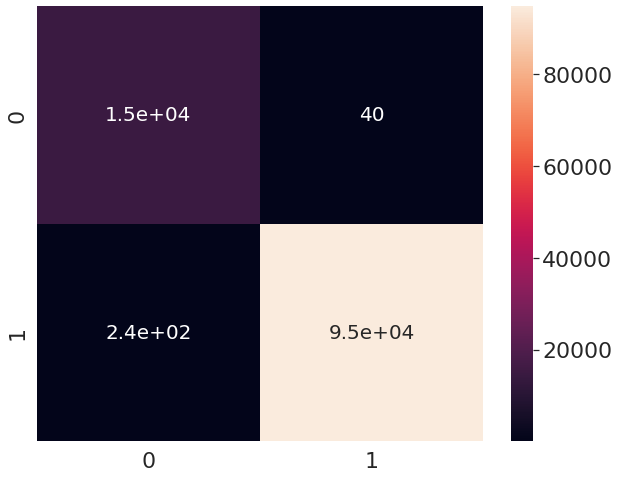

AUC score:  9.973650161310206e-01


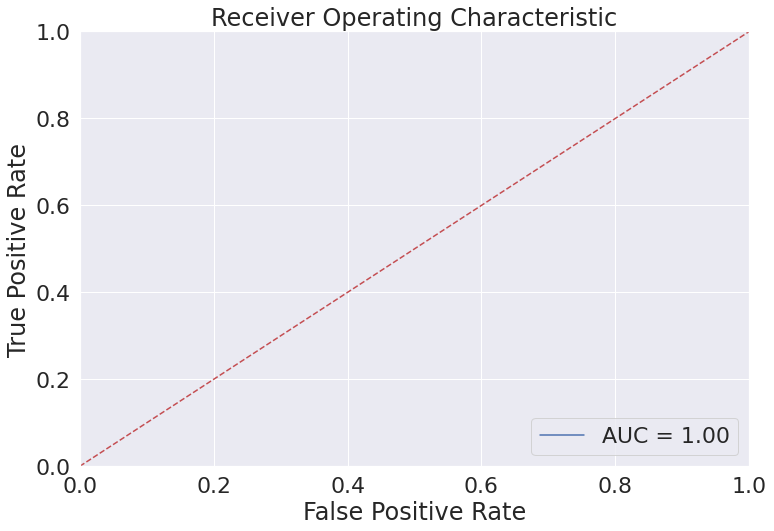

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [31]:
# does not use algorithm
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_algo = False)

Shape:  (109860, 115) (109860,)
----------------------Test is starting----------------------
Scale data
Shape:  (109860, 115) (109860,)
Normalize data
Shape:  (109860, 115) (109860,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.986     0.993     0.990     14865
           2      0.999     0.998     0.998     94995

    accuracy                          0.997    109860
   macro avg      0.993     0.996     0.994    109860
weighted avg      0.997     0.997     0.997    109860



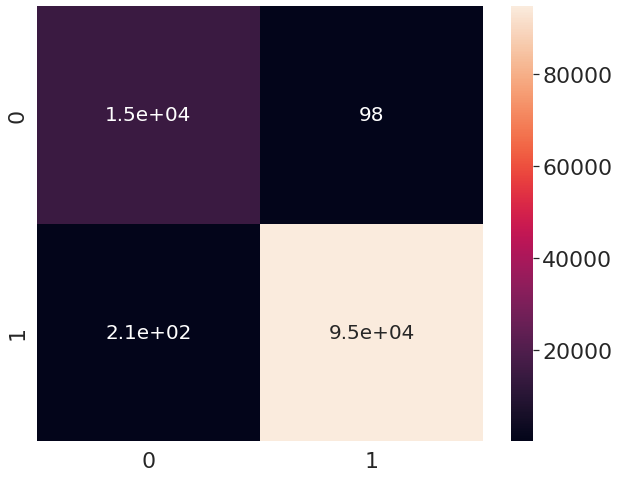

AUC score:  0.995603608432522


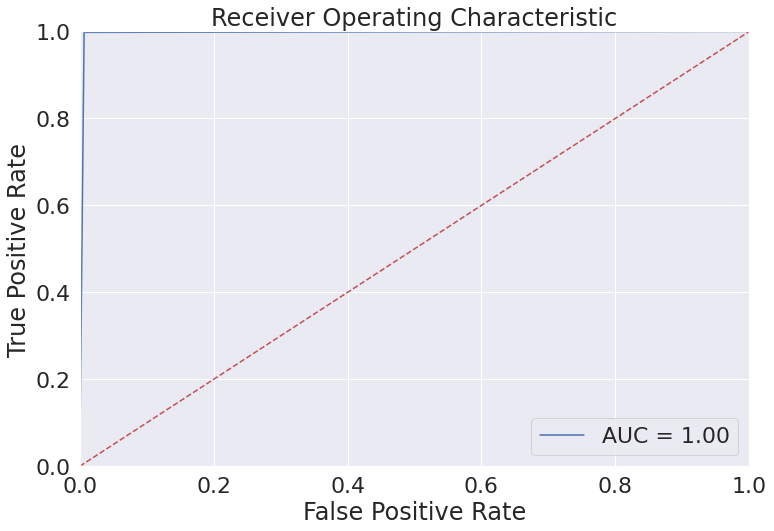

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [32]:
# use KNN
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt,
         y_test=y_test_gafgyt, using_algo=True, algo='KNN')

Shape:  (109860, 115) (109860,)
----------------------Test is starting----------------------
Scale data
Shape:  (109860, 115) (109860,)
Normalize data
Shape:  (109860, 115) (109860,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.986     0.993     0.990     14865
           2      0.999     0.998     0.998     94995

    accuracy                          0.997    109860
   macro avg      0.993     0.996     0.994    109860
weighted avg      0.997     0.997     0.997    109860



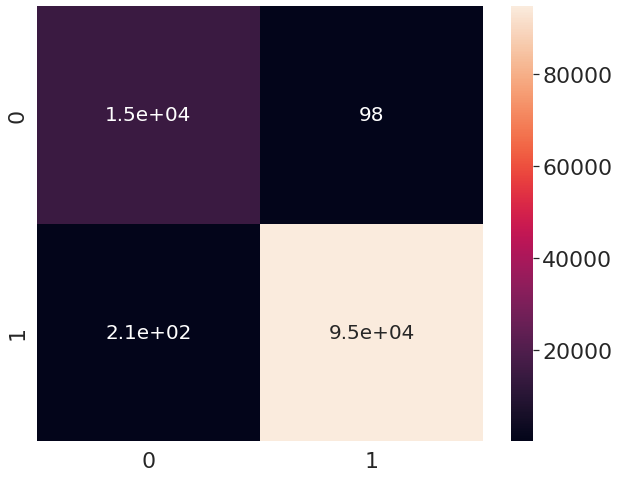

AUC score:  0.995603608432522


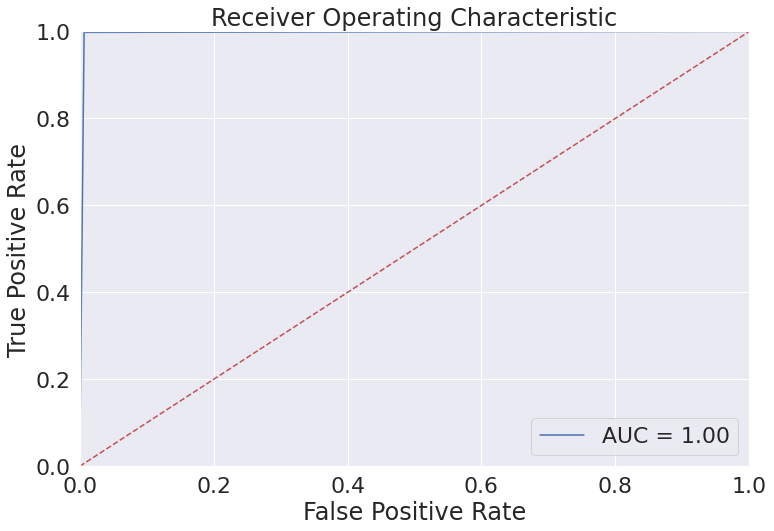

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [33]:
# use SVM
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt,
         y_test=y_test_gafgyt, using_algo=True, algo='SVM')

Shape:  (109860, 115) (109860,)
----------------------Test is starting----------------------
Scale data
Shape:  (109860, 115) (109860,)
Normalize data
Shape:  (109860, 115) (109860,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.986     0.993     0.990     14865
           2      0.999     0.998     0.998     94995

    accuracy                          0.997    109860
   macro avg      0.993     0.996     0.994    109860
weighted avg      0.997     0.997     0.997    109860



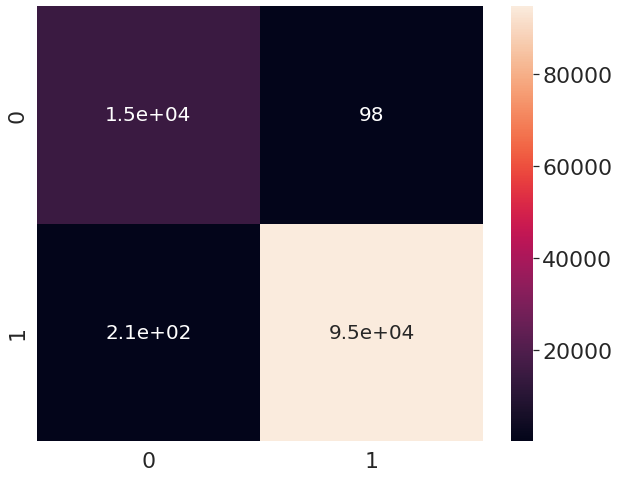

AUC score:  0.995603608432522


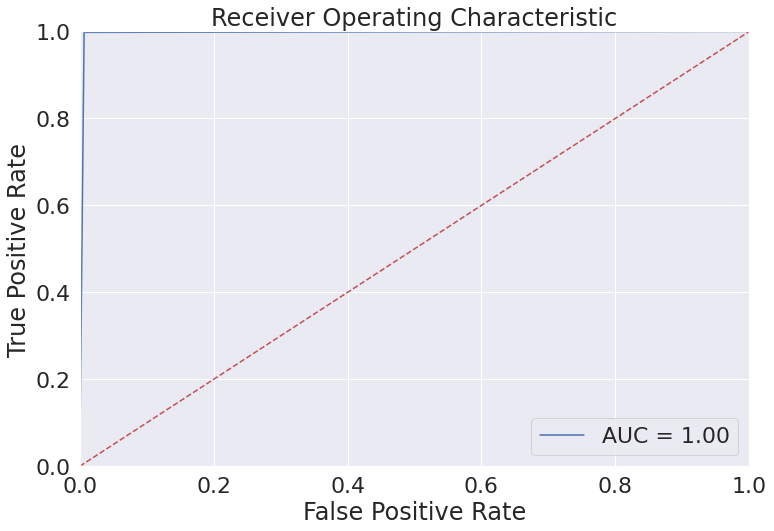

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [34]:
# use Softmax
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt,
         y_test=y_test_gafgyt, using_algo=True, algo='SOFTMAX')

Shape:  (109860, 115) (109860,)
----------------------Test is starting----------------------
Scale data
Shape:  (109860, 115) (109860,)
Normalize data
Shape:  (109860, 115) (109860,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.986     0.993     0.990     14865
           2      0.999     0.998     0.998     94995

    accuracy                          0.997    109860
   macro avg      0.993     0.996     0.994    109860
weighted avg      0.997     0.997     0.997    109860



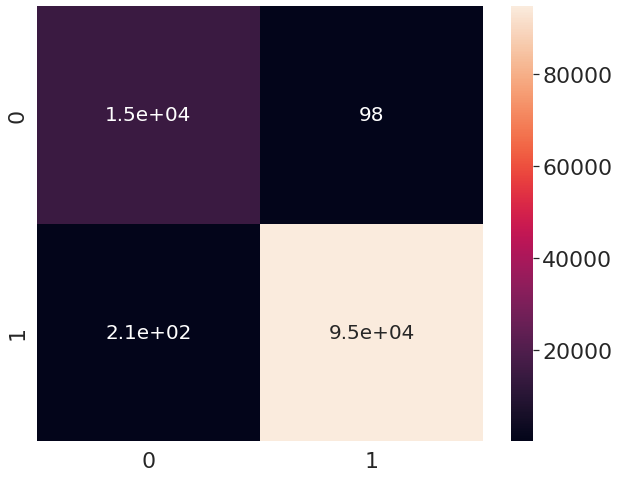

AUC score:  0.995603608432522


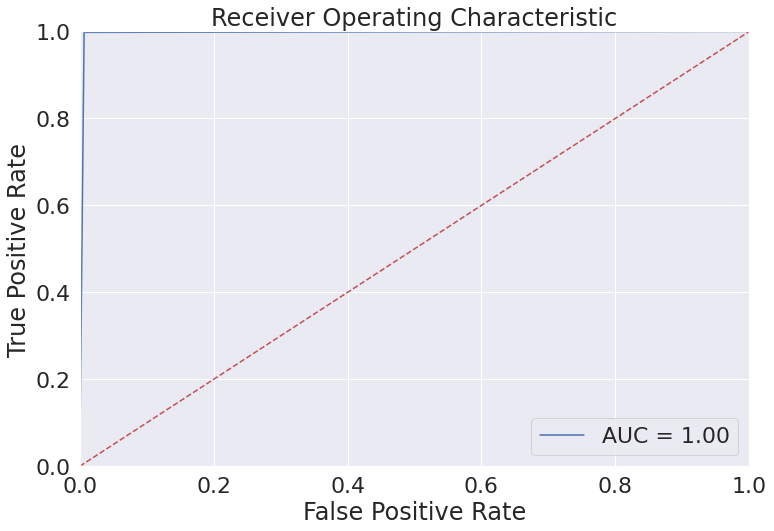

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [35]:
# use Random Forest
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt,
         y_test=y_test_gafgyt, using_algo=True, algo='RF')

#### Test on Mirai

Shape:  (147346, 115) (147346,)
----------------------Test is starting----------------------
Scale data
Shape:  (147346, 115) (147346,)
Normalize data
Shape:  (147346, 115) (147346,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.181     0.993     0.307     10413
           2      0.999     0.659     0.794    136933

    accuracy                          0.683    147346
   macro avg      0.590     0.826     0.550    147346
weighted avg      0.941     0.683     0.760    147346



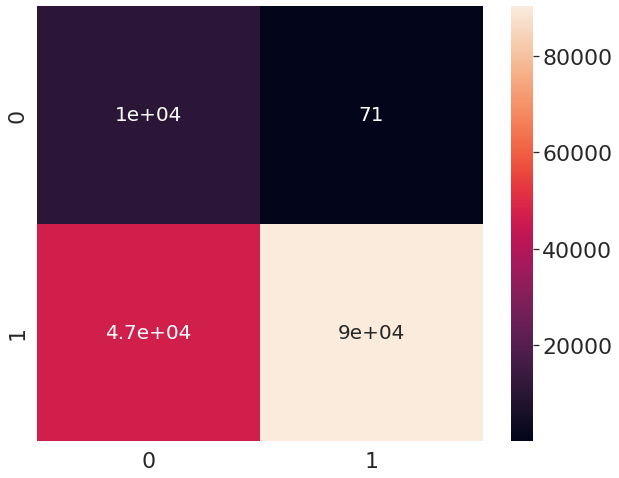

AUC score:  0.8261132671535709


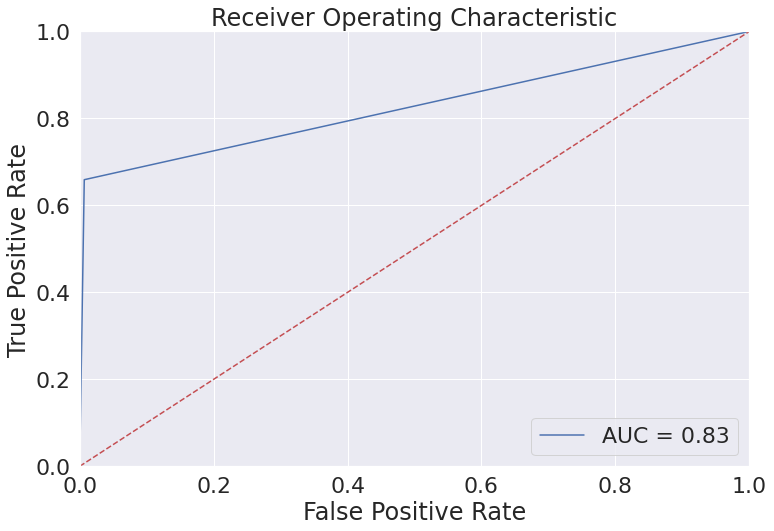

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [36]:
# doest not use algorithm
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_mirai, y_test=y_test_mirai, using_algo = False)

Shape:  (147346, 115) (147346,)
----------------------Test is starting----------------------
Scale data
Shape:  (147346, 115) (147346,)
Normalize data
Shape:  (147346, 115) (147346,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.181     0.993     0.307     10413
           2      0.999     0.659     0.794    136933

    accuracy                          0.683    147346
   macro avg      0.590     0.826     0.550    147346
weighted avg      0.941     0.683     0.760    147346



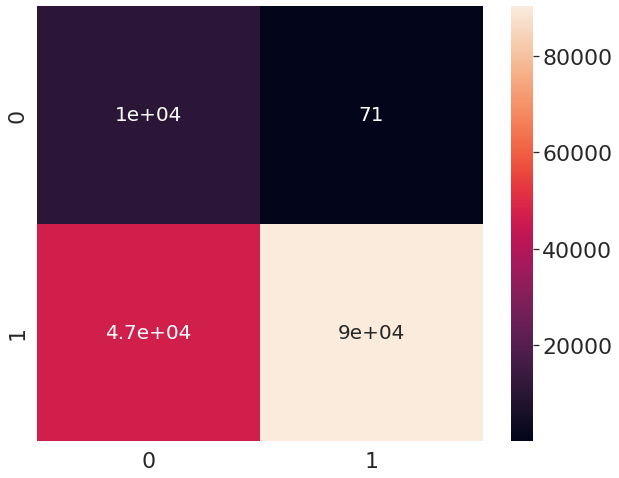

AUC score:  0.8261132671535709


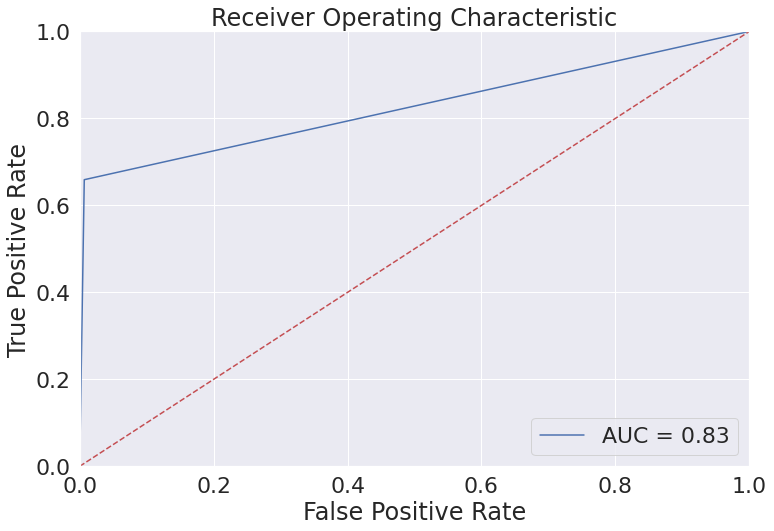

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [37]:
# use KNN
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_mirai, y_test=y_test_mirai, using_algo = True, algo='KNN')

Shape:  (147346, 115) (147346,)
----------------------Test is starting----------------------
Scale data
Shape:  (147346, 115) (147346,)
Normalize data
Shape:  (147346, 115) (147346,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.181     0.993     0.307     10413
           2      0.999     0.659     0.794    136933

    accuracy                          0.683    147346
   macro avg      0.590     0.826     0.550    147346
weighted avg      0.941     0.683     0.760    147346



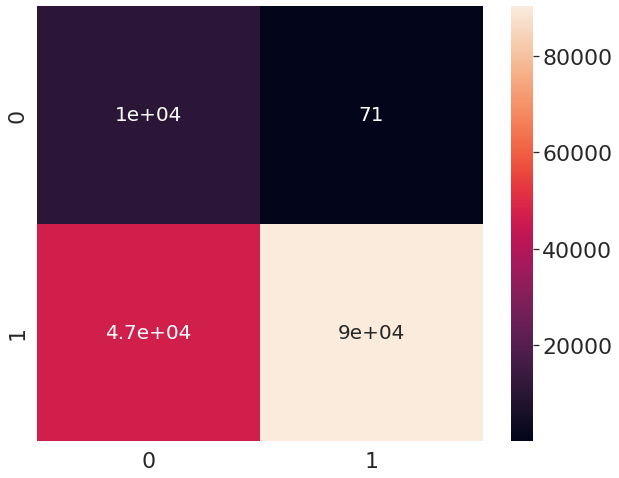

AUC score:  0.8261132671535709


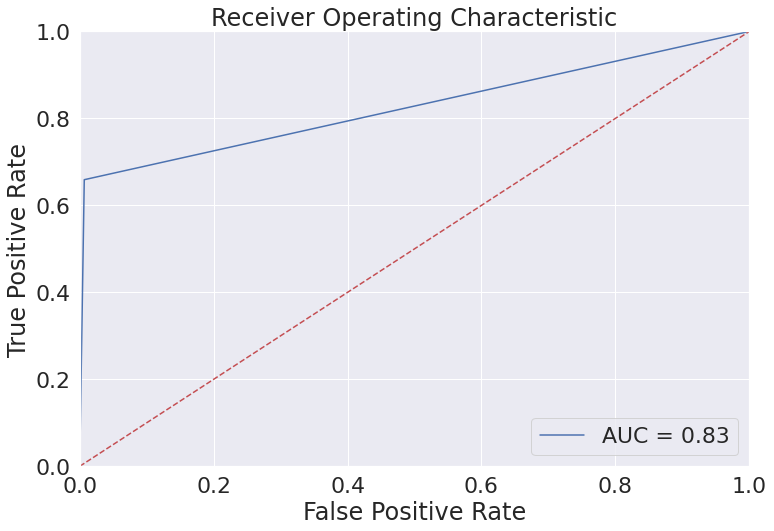

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [38]:
# use SVM
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_mirai, y_test=y_test_mirai, using_algo = True, algo='SVM')

Shape:  (147346, 115) (147346,)
----------------------Test is starting----------------------
Scale data
Shape:  (147346, 115) (147346,)
Normalize data
Shape:  (147346, 115) (147346,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.181     0.993     0.307     10413
           2      0.999     0.659     0.794    136933

    accuracy                          0.683    147346
   macro avg      0.590     0.826     0.550    147346
weighted avg      0.941     0.683     0.760    147346



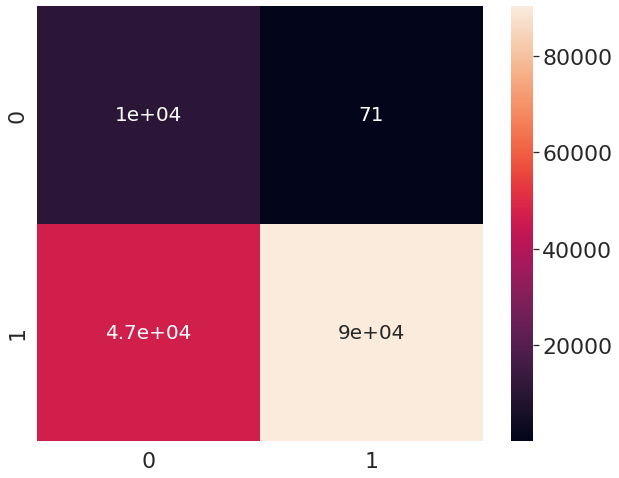

AUC score:  0.8261132671535709


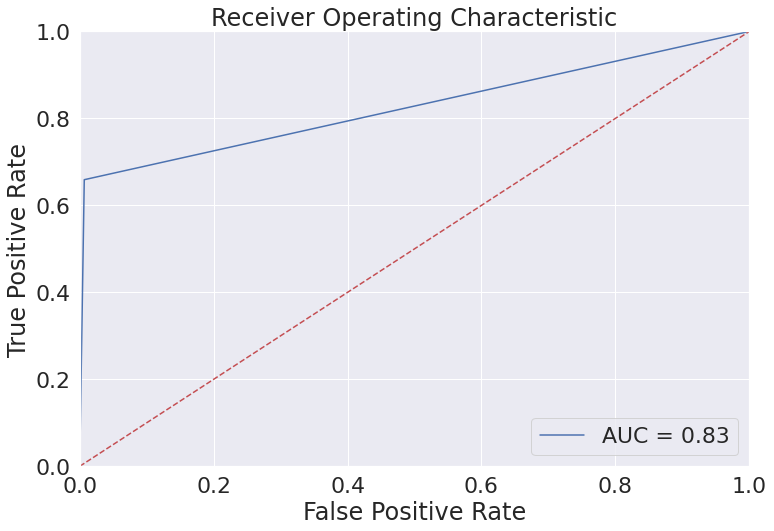

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [39]:
# use Softmax
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_mirai, y_test=y_test_mirai, using_algo = True, algo='SOFTMAX')

Shape:  (147346, 115) (147346,)
----------------------Test is starting----------------------
Scale data
Shape:  (147346, 115) (147346,)
Normalize data
Shape:  (147346, 115) (147346,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.181     0.993     0.307     10413
           2      0.999     0.659     0.794    136933

    accuracy                          0.683    147346
   macro avg      0.590     0.826     0.550    147346
weighted avg      0.941     0.683     0.760    147346



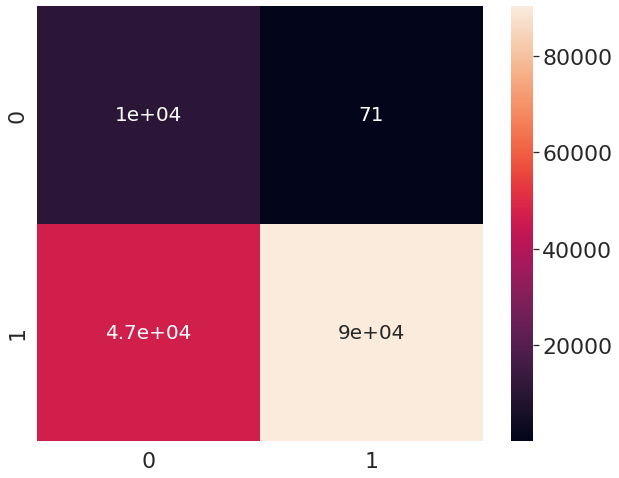

AUC score:  0.8261132671535709


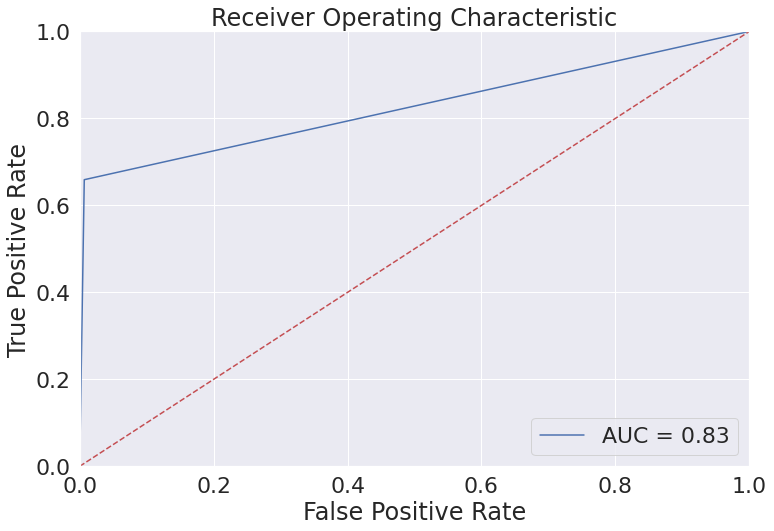

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [40]:
# use Random Forest
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_mirai, y_test=y_test_mirai, using_algo = True, algo='RF')


## 2.1.4. Anneal

### Train

In [ ]:
# som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_gafgyt_1, 
#                                                                  y_train=y_train_gafgyt_1, algo='anneal')

### Test on the same device

#### Test on gafgyt

In [ ]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = False)

In [ ]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = True)

#### Test on Mirai

In [ ]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_mirai, y_test=y_test_mirai, using_knn = False)

In [ ]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_mirai, y_test=y_test_mirai, using_knn = True)

## 2.2. Train Mirai

## 2.2.1. RAND

In [ ]:
# som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_mirai_1, 
#                                                                  y_train=y_train_mirai_1, algo='rand')

### Test on the same device

#### Test on gafgyt

In [ ]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = False)

In [ ]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = True)

#### Test on Mirai

In [ ]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_mirai, y_test=y_test_mirai, using_knn = False)

In [ ]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_mirai, y_test=y_test_mirai, using_knn = True)

## 2.2.2. TPE

### Train

In [ ]:
# som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_mirai_1, 
#                                                                  y_train=y_train_mirai_1, algo='tpe')

### Test on the same device

#### Test on gafgyt

In [ ]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = False)

In [ ]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = True)

#### Test on Mirai

In [ ]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_mirai, y_test=y_test_mirai, using_knn = False)

In [ ]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_mirai, y_test=y_test_mirai, using_knn = True)


## 2.2.3. ATPE

### Train

In [41]:
som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_mirai_1, 
                                                                 y_train=y_train_mirai_1, algo='atpe')

--------------Training and testing in the same device----------------
(69366, 115) (69366,)
------------Scale data-----------------
(69366, 115) (69366,)
X_train_scaled
[[ 3.00597876e-03  1.84273989e-01  0.00000000e+00 ...  3.74036249e-16
   1.74152528e-28  3.83142753e-13]
 [ 3.00597876e-03  1.77047558e-01  0.00000000e+00 ...  6.69037812e-16
  -1.63225311e-32  0.00000000e+00]
 [ 6.00620057e-03  1.84273989e-01  2.84335042e-17 ...  3.74036249e-16
   5.14489822e-32  1.13394775e-16]
 ...
 [ 3.00597922e-03  1.08396475e-01  4.12813862e-09 ...  1.86558621e-16
  -3.20987013e-32 -1.41904724e-16]
 [ 8.99079337e-03  1.84273989e-01  5.68670084e-17 ...  3.34518906e-16
  -1.01076761e-34  0.00000000e+00]
 [ 1.20233264e-02  1.84273989e-01  2.84335042e-17 ...  8.89599728e-15
   3.25540020e-26  2.95419833e-12]]
---------Normalize data--------------
(69366, 115) (69366,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM------------------------------

### Test on the same device

#### Test on gafgyt

Shape:  (109860, 115) (109860,)
----------------------Test is starting----------------------
Scale data
Shape:  (109860, 115) (109860,)
Normalize data
Shape:  (109860, 115) (109860,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.806     0.998     0.892     14865
           2      1.000     0.963     0.981     94995

    accuracy                          0.967    109860
   macro avg      0.903     0.980     0.936    109860
weighted avg      0.974     0.967     0.969    109860



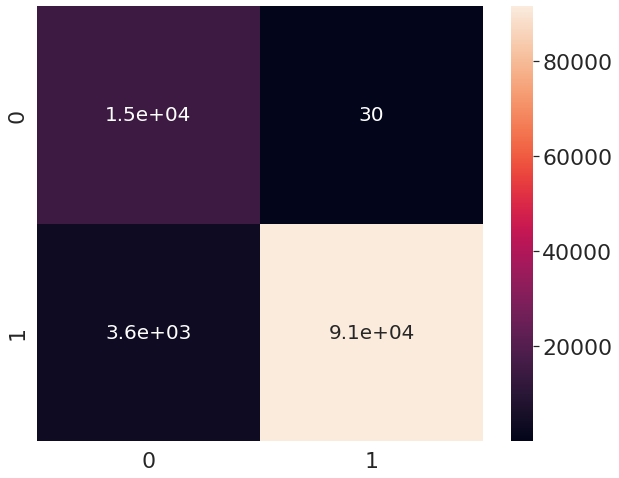

AUC score:  9.802478265227087e-01


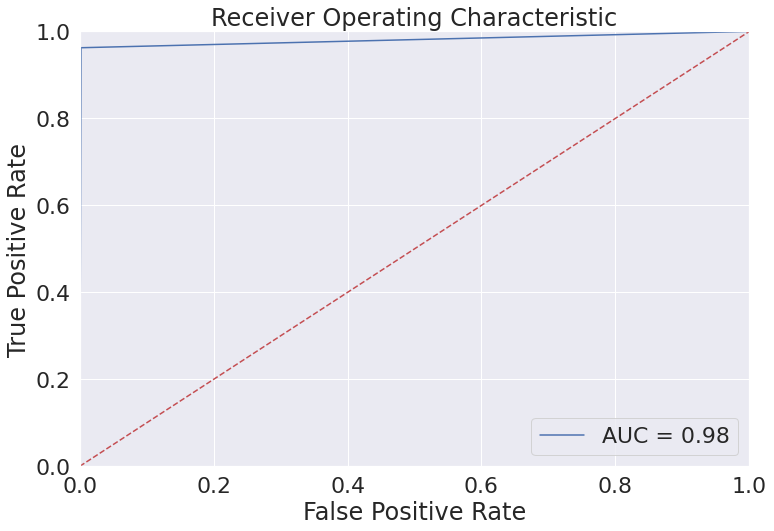

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [42]:
# doest not use algorithm
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_algo = False)

Shape:  (109860, 115) (109860,)
----------------------Test is starting----------------------
Scale data
Shape:  (109860, 115) (109860,)
Normalize data
Shape:  (109860, 115) (109860,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.806     0.998     0.892     14865
           2      1.000     0.963     0.981     94995

    accuracy                          0.967    109860
   macro avg      0.903     0.980     0.936    109860
weighted avg      0.974     0.967     0.969    109860



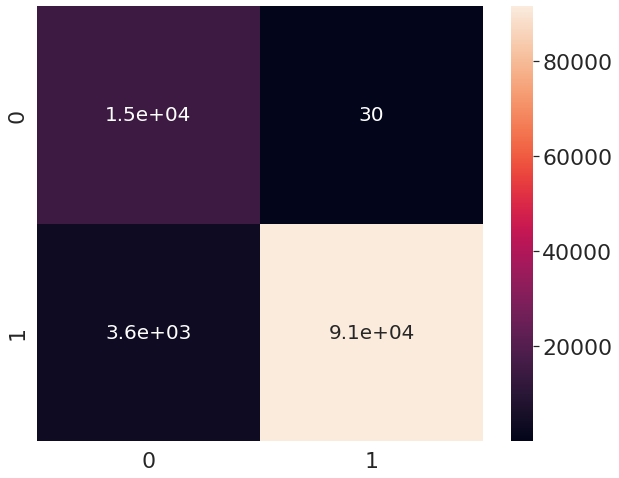

AUC score:  0.9802478265227087


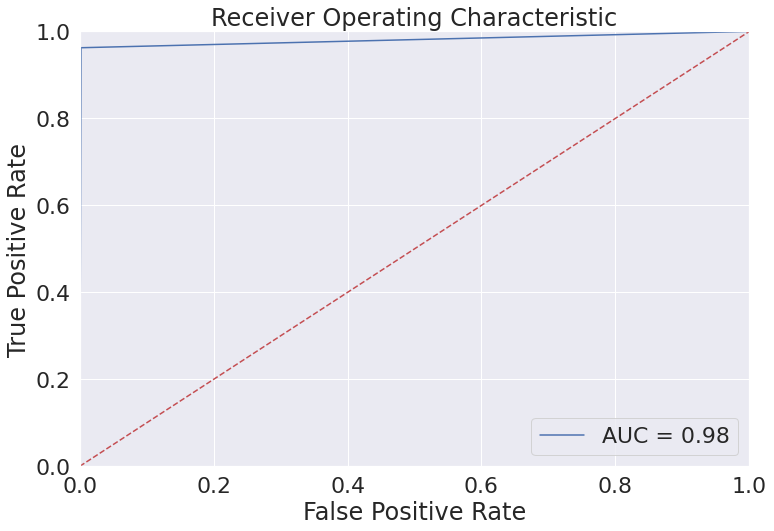

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [43]:
# use KNN
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_algo = True, algo = 'KNN')

Shape:  (109860, 115) (109860,)
----------------------Test is starting----------------------
Scale data
Shape:  (109860, 115) (109860,)
Normalize data
Shape:  (109860, 115) (109860,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.806     0.998     0.892     14865
           2      1.000     0.963     0.981     94995

    accuracy                          0.967    109860
   macro avg      0.903     0.980     0.936    109860
weighted avg      0.974     0.967     0.969    109860



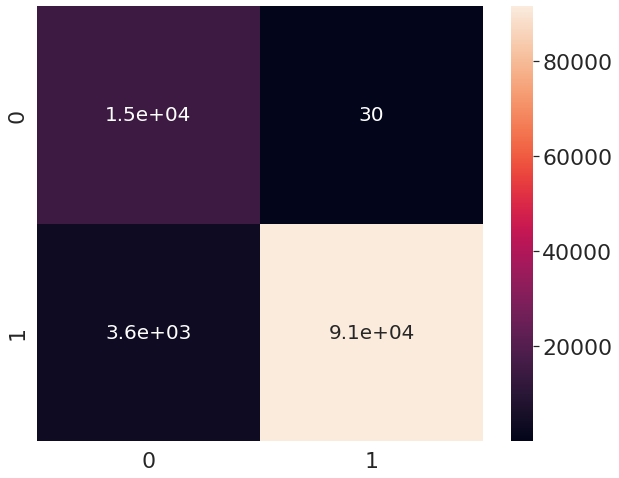

AUC score:  0.9802478265227087


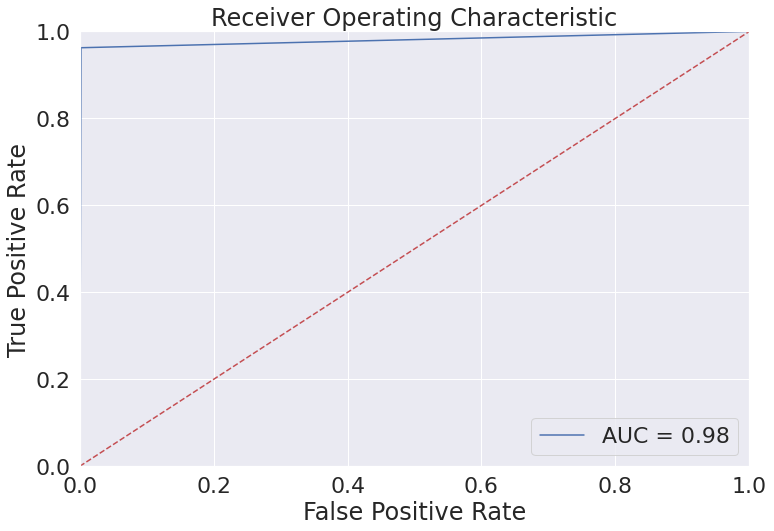

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [45]:
# use SVM
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_algo = True, algo = 'SVM')

Shape:  (109860, 115) (109860,)
----------------------Test is starting----------------------
Scale data
Shape:  (109860, 115) (109860,)
Normalize data
Shape:  (109860, 115) (109860,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.806     0.998     0.892     14865
           2      1.000     0.963     0.981     94995

    accuracy                          0.967    109860
   macro avg      0.903     0.980     0.936    109860
weighted avg      0.974     0.967     0.969    109860



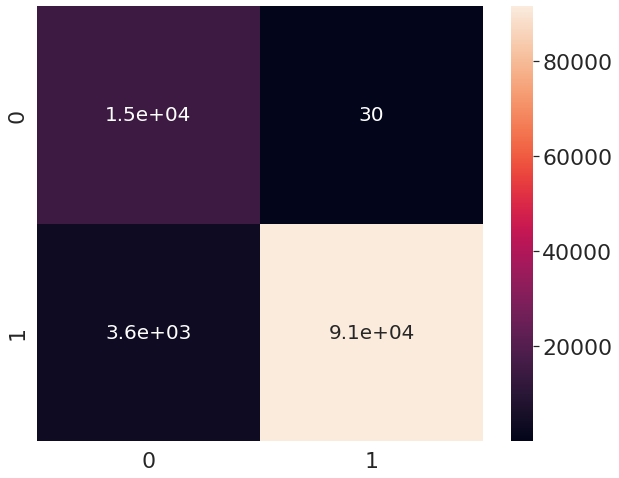

AUC score:  0.9802478265227087


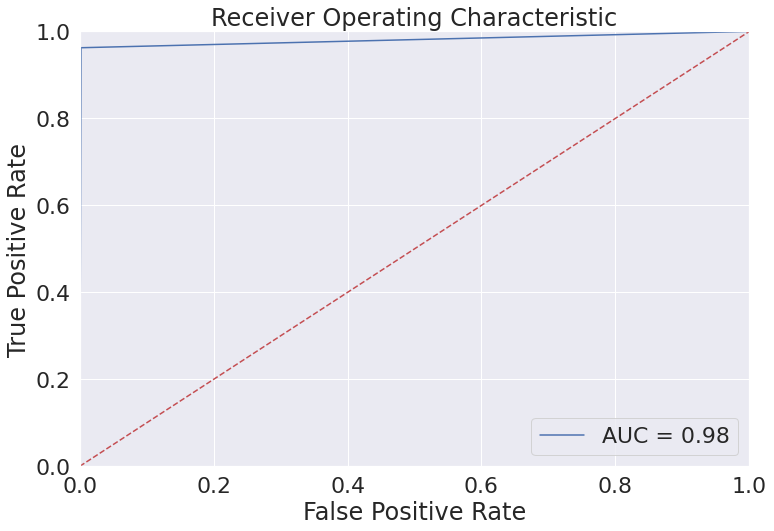

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [46]:
# use Softmax
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_algo = True, algo = 'SOFTMAX')

Shape:  (109860, 115) (109860,)
----------------------Test is starting----------------------
Scale data
Shape:  (109860, 115) (109860,)
Normalize data
Shape:  (109860, 115) (109860,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.806     0.998     0.892     14865
           2      1.000     0.963     0.981     94995

    accuracy                          0.967    109860
   macro avg      0.903     0.980     0.936    109860
weighted avg      0.974     0.967     0.969    109860



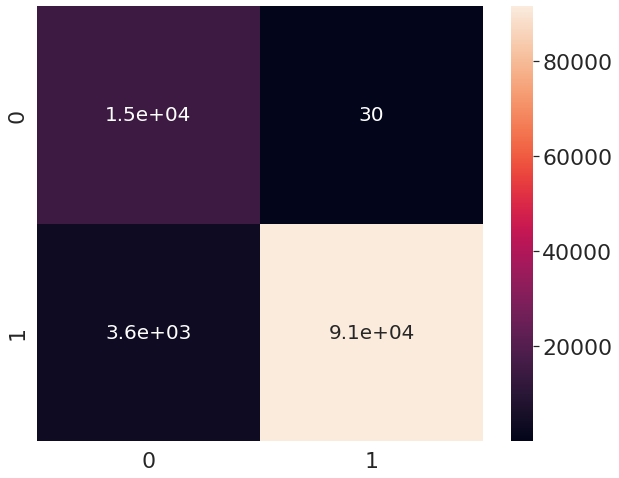

AUC score:  0.9802478265227087


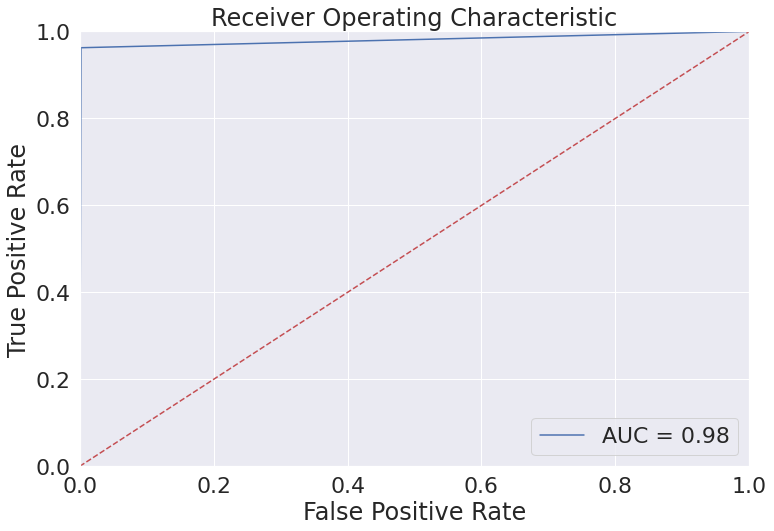

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [47]:
# use Random Forest
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_algo = True, algo = 'RF')

#### Test on Mirai

Shape:  (147346, 115) (147346,)
----------------------Test is starting----------------------
Scale data
Shape:  (147346, 115) (147346,)
Normalize data
Shape:  (147346, 115) (147346,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.996     0.998     0.997     10413
           2      1.000     1.000     1.000    136933

    accuracy                          1.000    147346
   macro avg      0.998     0.999     0.998    147346
weighted avg      1.000     1.000     1.000    147346



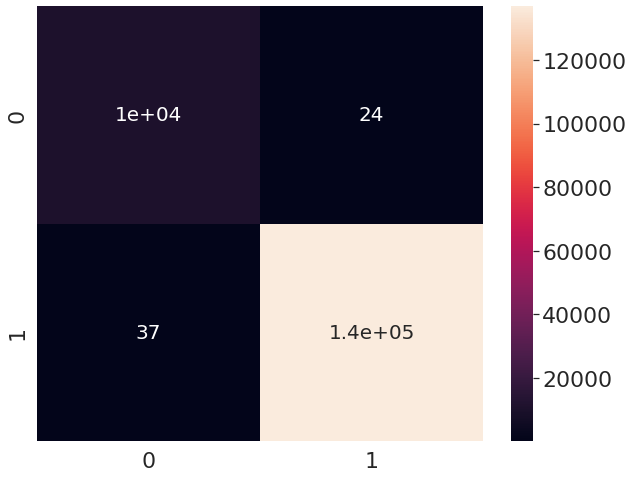

AUC score:  0.998712491784803


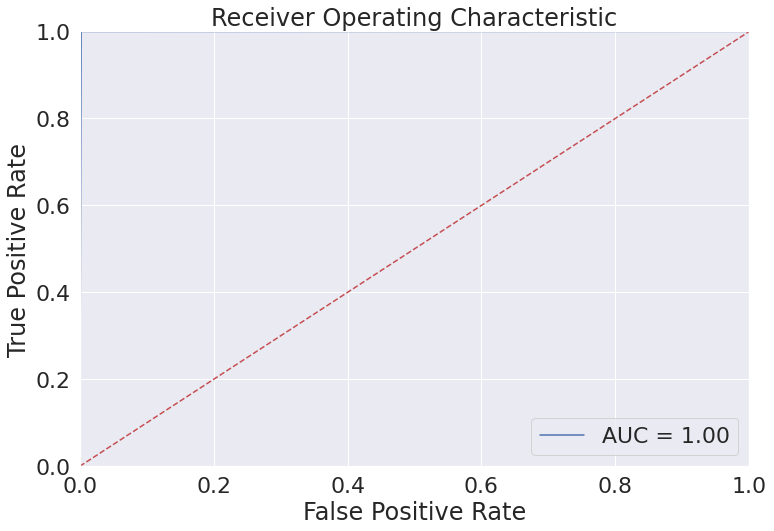

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [48]:
# does not use algorithm
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_mirai, y_test=y_test_mirai, using_algo = False)

Shape:  (147346, 115) (147346,)
----------------------Test is starting----------------------
Scale data
Shape:  (147346, 115) (147346,)
Normalize data
Shape:  (147346, 115) (147346,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.997     0.998     0.997     10413
           2      1.000     1.000     1.000    136933

    accuracy                          1.000    147346
   macro avg      0.998     0.999     0.998    147346
weighted avg      1.000     1.000     1.000    147346



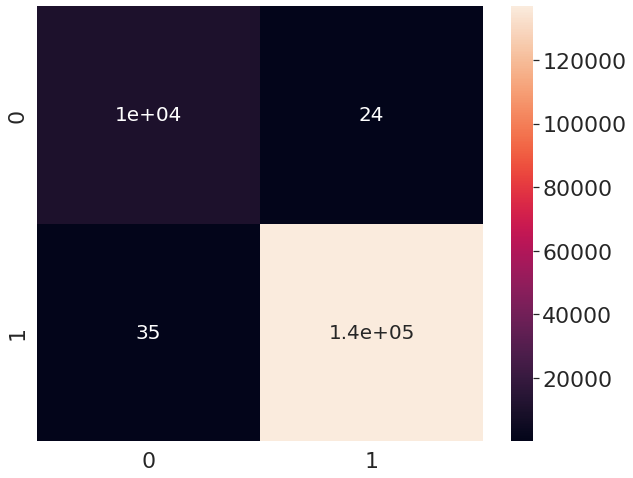

AUC score:  0.9987197946263386


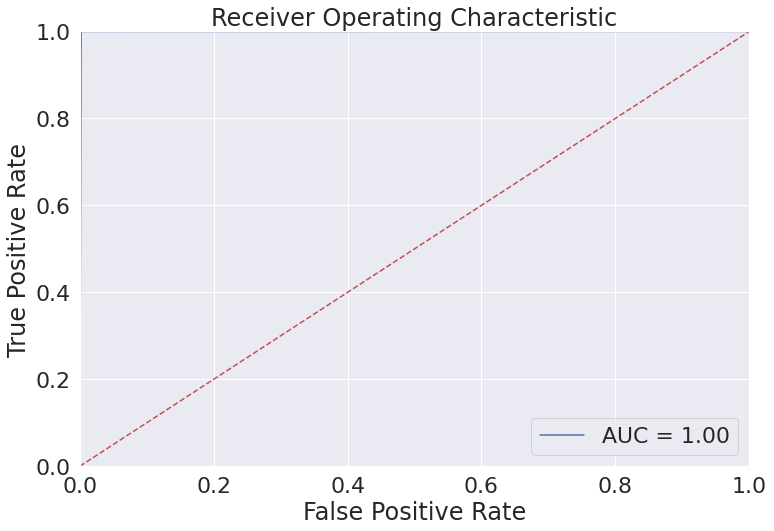

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [49]:
# use KNN
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_mirai, y_test=y_test_mirai, using_algo = True, algo = 'KNN')

Shape:  (147346, 115) (147346,)
----------------------Test is starting----------------------
Scale data
Shape:  (147346, 115) (147346,)
Normalize data
Shape:  (147346, 115) (147346,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.996     0.998     0.997     10413
           2      1.000     1.000     1.000    136933

    accuracy                          1.000    147346
   macro avg      0.998     0.999     0.998    147346
weighted avg      1.000     1.000     1.000    147346



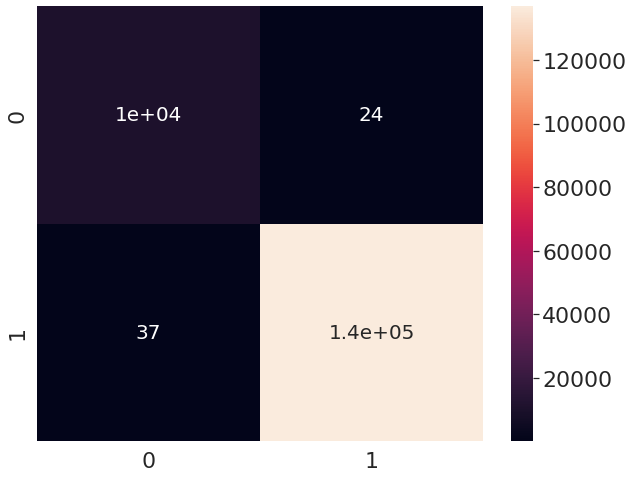

AUC score:  0.998712491784803


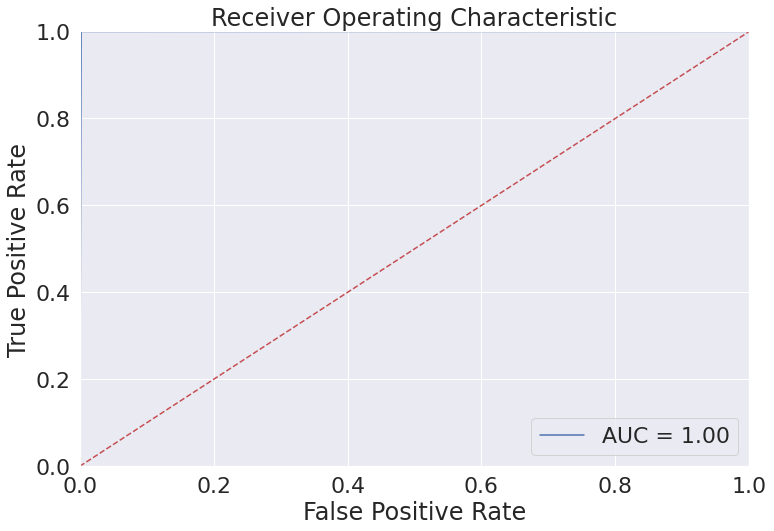

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [50]:
# use SVM
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_mirai, y_test=y_test_mirai, using_algo = True, algo = 'SVM')

Shape:  (147346, 115) (147346,)
----------------------Test is starting----------------------
Scale data
Shape:  (147346, 115) (147346,)
Normalize data
Shape:  (147346, 115) (147346,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.996     0.998     0.997     10413
           2      1.000     1.000     1.000    136933

    accuracy                          1.000    147346
   macro avg      0.998     0.999     0.998    147346
weighted avg      1.000     1.000     1.000    147346



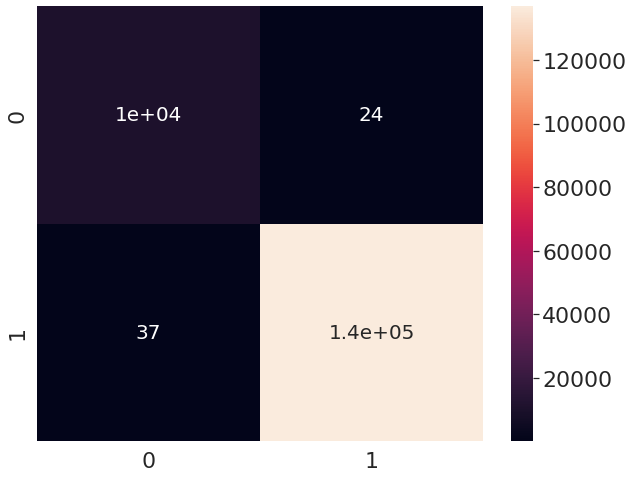

AUC score:  0.998712491784803


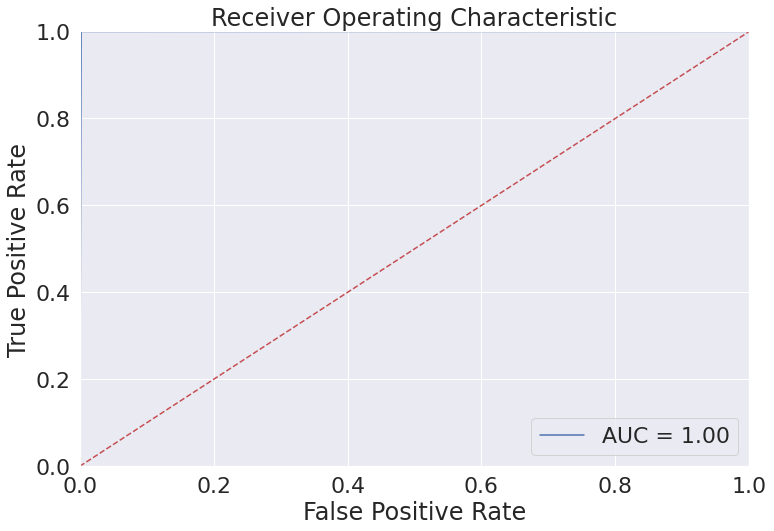

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [51]:
# use Softmax
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_mirai, y_test=y_test_mirai, using_algo = True, algo = 'SOFTMAX')

Shape:  (147346, 115) (147346,)
----------------------Test is starting----------------------
Scale data
Shape:  (147346, 115) (147346,)
Normalize data
Shape:  (147346, 115) (147346,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.996     0.998     0.997     10413
           2      1.000     1.000     1.000    136933

    accuracy                          1.000    147346
   macro avg      0.998     0.999     0.998    147346
weighted avg      1.000     1.000     1.000    147346



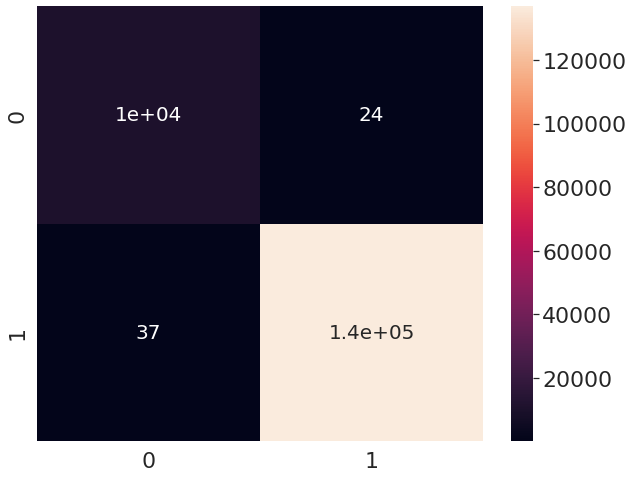

AUC score:  0.998712491784803


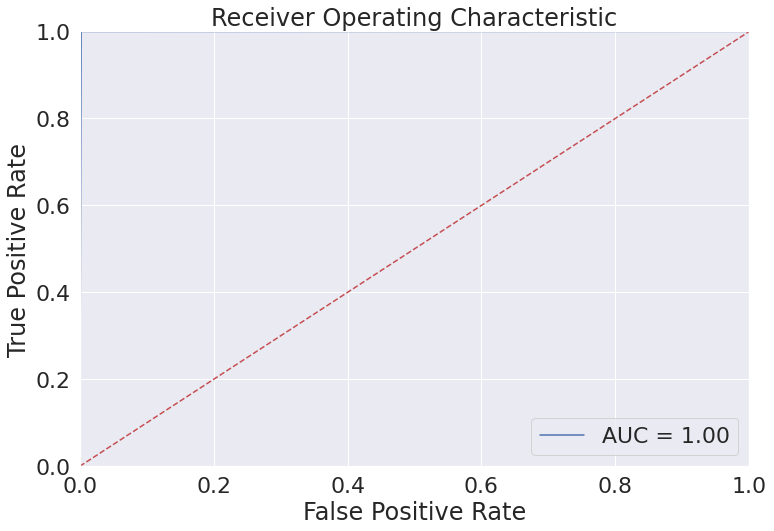

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [52]:
# use Random Forest
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_mirai, y_test=y_test_mirai, using_algo = True, algo = 'RF')


## 2.2.4. ANNEAL

### Train

In [ ]:
# som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_mirai_1, 
#                                                                  y_train=y_train_mirai_1, algo='anneal')

### Test on the same device

#### Test on gafgyt

In [ ]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = False)

In [ ]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = True)

#### Test on Mirai

In [ ]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, using_knn=False)

In [ ]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, using_knn=True)

# 3. Train and test with other algos

In [30]:
X_train_mirai_1.shape, X_train_mirai_1.shape, X_test_gafgyt.shape, X_test_mirai.shape

((69366, 115), (69366, 115), (109860, 115), (147346, 115))

In [31]:
type(X_train_gafgyt_1), type(X_test_gafgyt)

(numpy.ndarray, numpy.ndarray)

In [32]:
y_train_gafgyt_1.shape, y_train_mirai_1.shape, y_test_gafgyt.shape, y_test_mirai.shape

((69366,), (69366,), (109860,), (147346,))

In [33]:
np.unique(y_train_gafgyt_1), np.unique(y_train_mirai_1)

(array([0, 1, 2, 3, 4, 5]), array([0, 1, 2, 3, 4, 5]))

In [34]:
# import numpy as np
# from sklearn import svm, linear_model
# from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC
# from xgboost import XGBClassifier

# from utils.visualization import plot_confusion_matrix, plot_roc_curve_auc


# def dt_classify():
#     pass


# def rf_classify():
#     pass


# def svm_classify():
#     pass


# def classify(X_train, y_train, X_test, y_test, algo='DT'):
#     algo = algo.upper()
#     if algo.__eq__('KNN'):
#         clf = KNeighborsClassifier(n_neighbors=3, p=2)
#     elif algo.__eq__('SVM'):  # SVM kernel RBF
#         clf = svm.SVC(kernel='rbf', degree=3, C=1, decision_function_shape='ovo')
#     # if algo.__eq__('GMM'):
#     #     clf = dict((covar_type, GMM(n_components=n_classes,
#     #                                 covariance_type=covar_type, init_params='wc', n_iter=20))
#     #                for covar_type in ['spherical', 'diag', 'tied', 'full'])
#     elif algo.__eq__('SOFTMAX'):  # Softmax Regression
#         clf = linear_model.LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')

#     elif algo.__eq__('RF'):
#         clf = RandomForestClassifier(max_depth=2, random_state=0)
#     elif algo.__eq__('DT'):
#         clf = DecisionTreeClassifier(random_state=0)
#     elif algo.__eq__('XGB'):
#         clf = XGBClassifier(objective='binary:logistic', random_state=42)
#     else:
#         clf = KNeighborsClassifier(n_neighbors=3, p=2)
#     clf.fit(X_train, y_train)
#     y_pred = clf.predict(X_test)
#     print(np.unique(y_test))
#     print(np.unique(y_pred))
#     y_test = [i if i == 1 else 2 for i in y_test]
#     y_pred = [i if i == 1 else 2 for i in y_pred]
#     print(classification_report(y_test, y_pred, digits=3))
#     # pretty_plot_confusion_matrix(y_test=y_test, predictions=y_pred)
#     # print confusion matrix
#     cm = confusion_matrix(y_test, y_pred)
#     plot_confusion_matrix(cm=cm)
#     # plot roc curve and calculate auc_score
#     # chi su dung cho tu hai lop tro len
#     if len(np.unique(y_test)) >= 2 and len(np.unique(y_pred)) >= 2:
#         fpr, tpr, threshold = roc_curve(y_test, y_pred, pos_label=2)
#         auc_score = roc_auc_score(y_test, y_pred)
#         print("AUC score: ", auc_score)
#         # roc_auc = auc(fpr, tpr)
#         # print(roc_auc)
#         plot_roc_curve_auc(fpr=fpr, tpr=tpr, roc_auc=auc_score)


In [35]:
from pyscripts.classifier import classify_train, classify_test

## 3.1. KNN

### Train on Gafgyt

In [36]:
clf = classify_train(X_train=X_train_gafgyt_1, y_train=y_train_gafgyt_1, algo='KNN')

### test
#### On Gafgyt

              precision    recall  f1-score   support

           0      0.984     1.000     0.992     14865
           1      1.000     0.998     0.999     94995

    accuracy                          0.998    109860
   macro avg      0.992     0.999     0.995    109860
weighted avg      0.998     0.998     0.998    109860



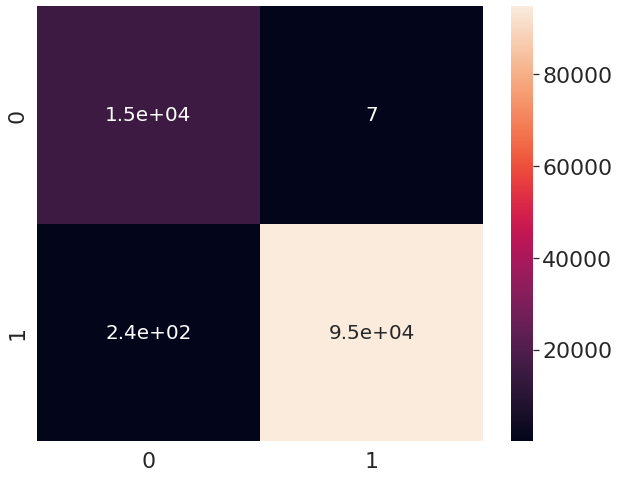

AUC score:  0.9985171135195442


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


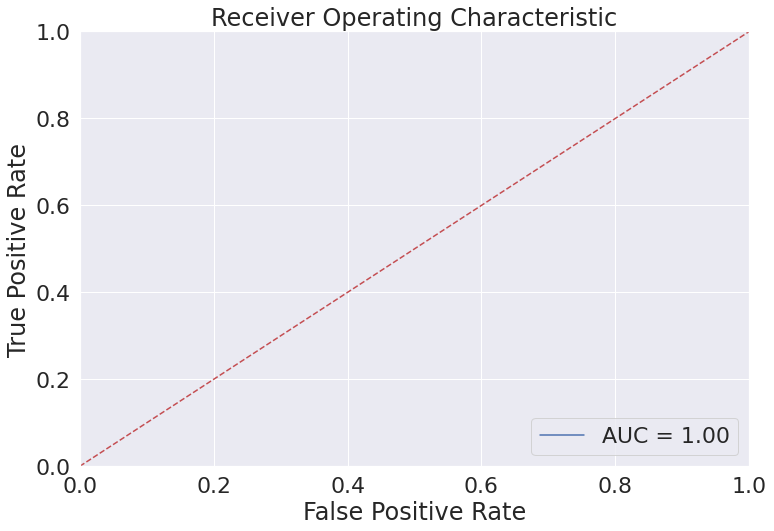

In [37]:
classify_test(clf=clf, X_test=X_test_gafgyt, y_test=y_test_gafgyt)

#### On Mirai

              precision    recall  f1-score   support

           0      0.142     1.000     0.249     10413
           1      1.000     0.541     0.702    136933

    accuracy                          0.573    147346
   macro avg      0.571     0.770     0.475    147346
weighted avg      0.939     0.573     0.670    147346



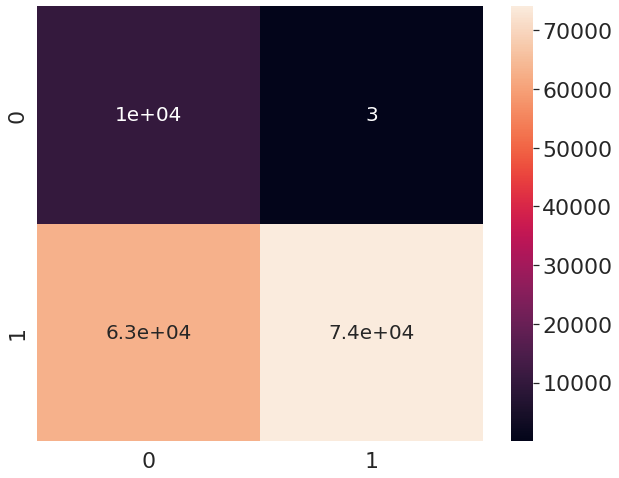

AUC score:  0.7703057313043317


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


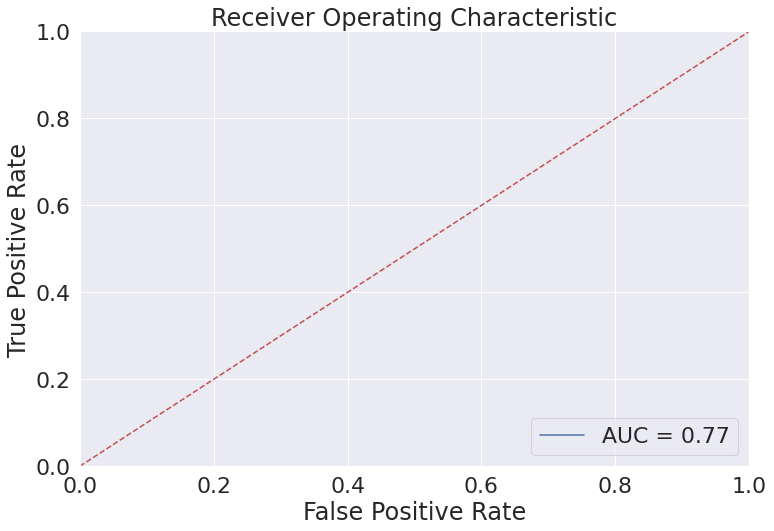

In [38]:
classify_test(clf=clf, X_test=X_test_mirai, y_test=y_test_mirai)

### Train on Mirai

In [39]:
clf = classify_train(X_train=X_train_mirai_1, y_train=y_train_mirai_1, algo='KNN')

### Testing
#### On Gafgyt

              precision    recall  f1-score   support

           0      0.177     0.997     0.300     14865
           1      0.998     0.273     0.429     94995

    accuracy                          0.371    109860
   macro avg      0.588     0.635     0.365    109860
weighted avg      0.887     0.371     0.412    109860



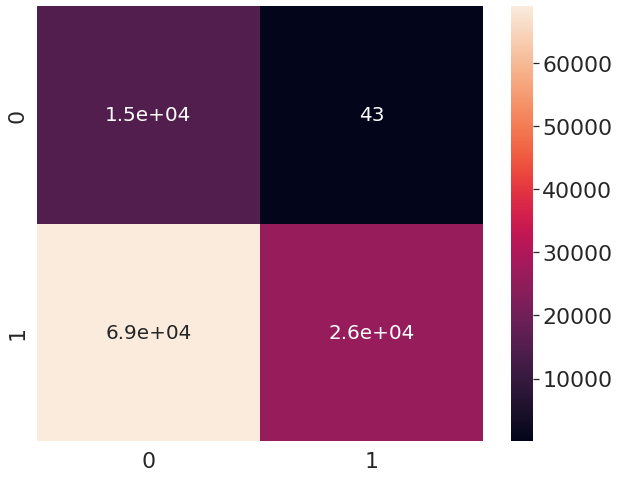

AUC score:  0.6352924252373152


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


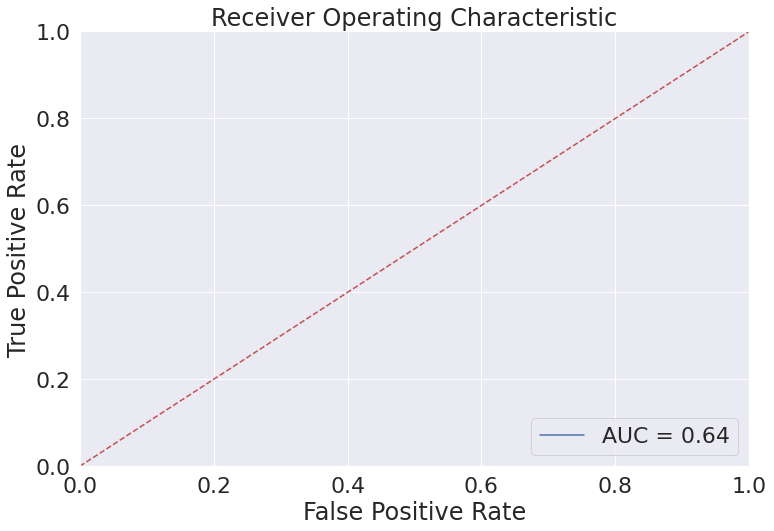

In [41]:
classify_test(clf=clf, X_test=X_test_gafgyt, y_test=y_test_gafgyt)

              precision    recall  f1-score   support

           0      0.918     0.997     0.956     10413
           1      1.000     0.993     0.996    136933

    accuracy                          0.993    147346
   macro avg      0.959     0.995     0.976    147346
weighted avg      0.994     0.993     0.994    147346



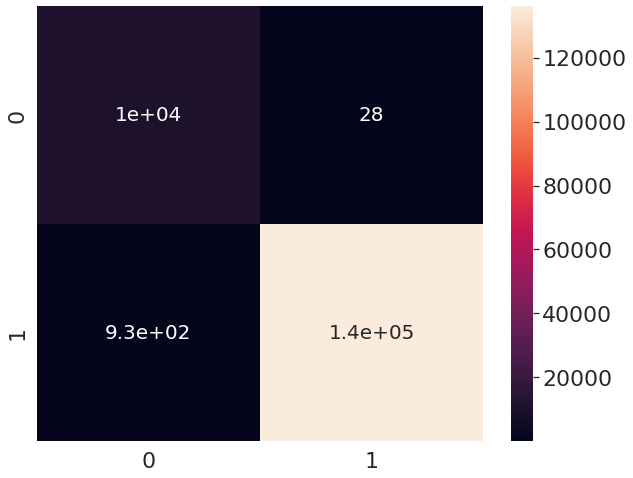

AUC score:  0.9952560540105732


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


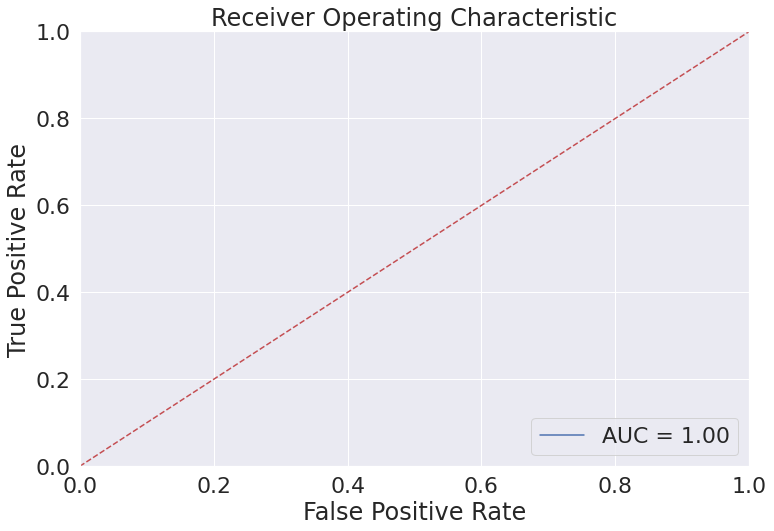

In [42]:
# on Mirai
classify_test(clf=clf, X_test=X_test_mirai, y_test=y_test_mirai)

## 3.2. SVM
### Train on Gafgyt

In [43]:
clf = classify_train(X_train=X_train_gafgyt_1, y_train=y_train_gafgyt_1, algo='SVM')

              precision    recall  f1-score   support

           0      0.143     1.000     0.250     14865
           1      0.999     0.060     0.113     94995

    accuracy                          0.187    109860
   macro avg      0.571     0.530     0.181    109860
weighted avg      0.883     0.187     0.132    109860



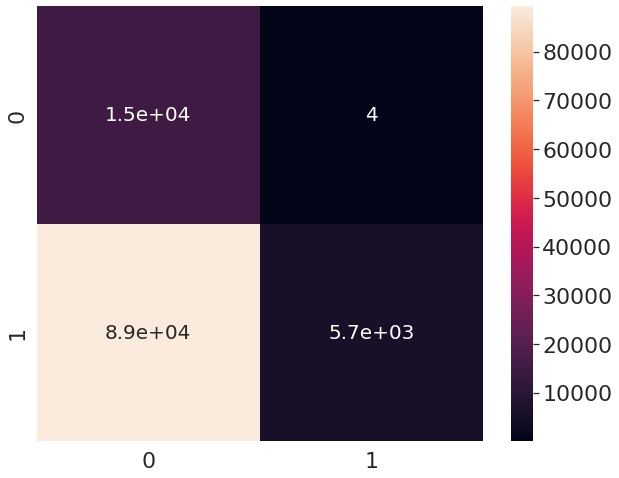

AUC score:  0.529840717624471


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


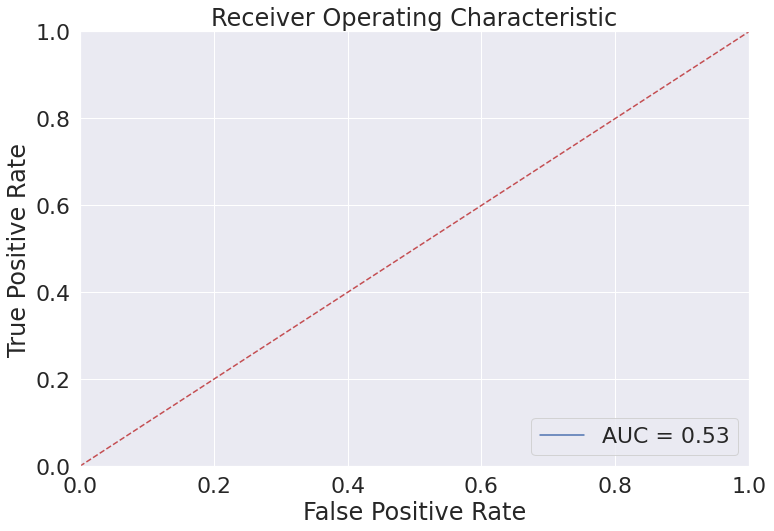

In [44]:
# Testing on gafgyt
classify_test(clf=clf, X_test=X_test_gafgyt, y_test=y_test_gafgyt)

              precision    recall  f1-score   support

           0      0.071     1.000     0.132     10413
           1      0.250     0.000     0.000    136933

    accuracy                          0.071    147346
   macro avg      0.160     0.500     0.066    147346
weighted avg      0.237     0.071     0.009    147346



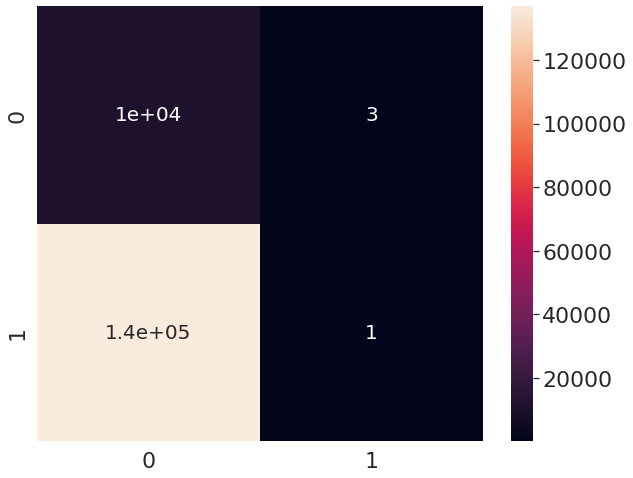

AUC score:  0.4998596007149194


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


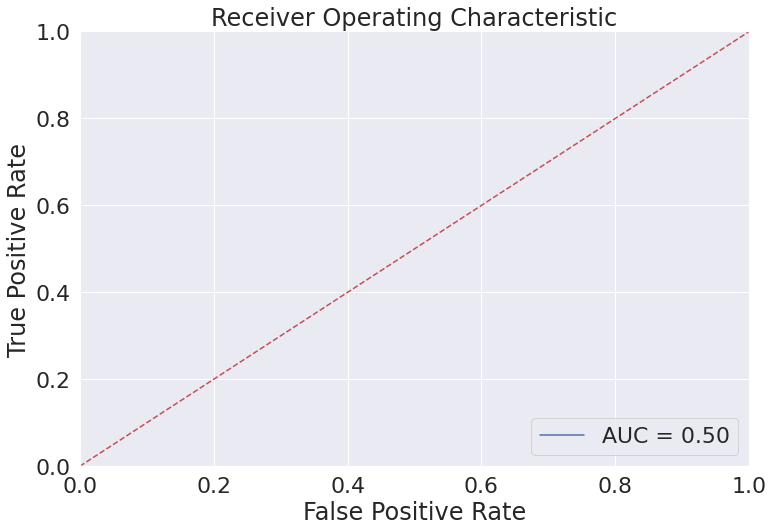

In [45]:
# Testing on Mirai
classify_test(clf=clf, X_test=X_test_mirai, y_test=y_test_mirai)

### Train on Mirai

In [46]:
clf = classify_train(X_train=X_train_mirai_1, y_train=y_train_mirai_1, algo='SVM')

              precision    recall  f1-score   support

           0      0.135     1.000     0.238     14865
           1      1.000     0.000     0.000     94995

    accuracy                          0.135    109860
   macro avg      0.568     0.500     0.119    109860
weighted avg      0.883     0.135     0.032    109860



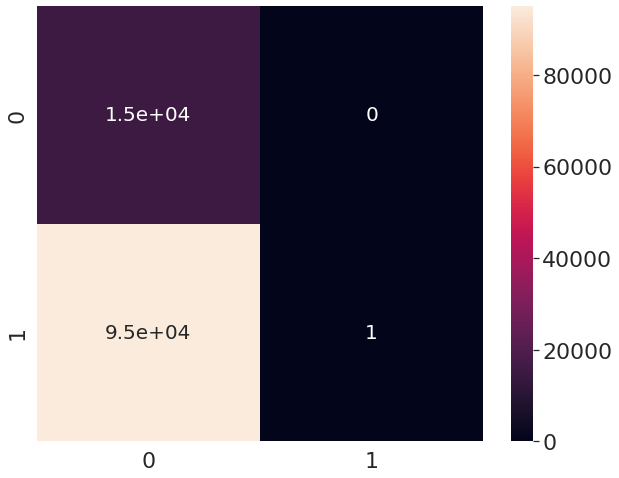

AUC score:  0.5000052634349176


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


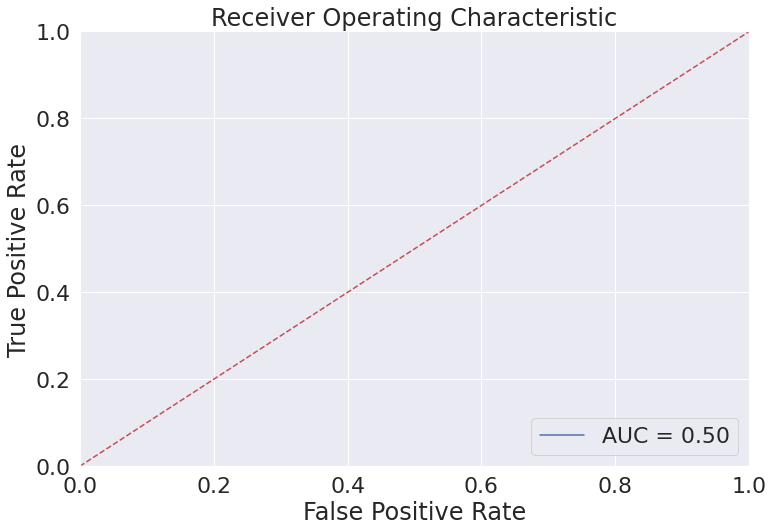

In [47]:
# Testing on gafgyt
classify_test(clf=clf, X_test=X_test_gafgyt, y_test=y_test_gafgyt)

              precision    recall  f1-score   support

           0      0.071     1.000     0.132     10413
           1      0.000     0.000     0.000    136933

    accuracy                          0.071    147346
   macro avg      0.035     0.500     0.066    147346
weighted avg      0.005     0.071     0.009    147346



/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


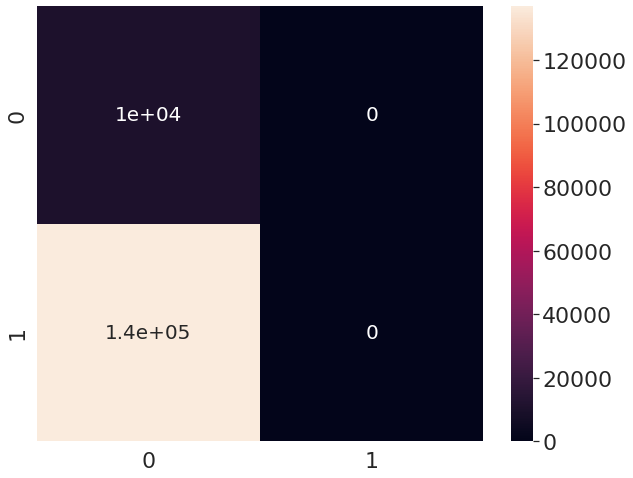

In [48]:
# Testing on Mirai
classify_test(clf=clf, X_test=X_test_mirai, y_test=y_test_mirai)

## 3.3. Softmax

### Train on Gafgyt

In [49]:
clf = classify_train(X_train=X_train_gafgyt_1, y_train=y_train_gafgyt_1, algo='SOFTMAX')

/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0      0.135     1.000     0.238     14865
           1      0.000     0.000     0.000     94995

    accuracy                          0.135    109860
   macro avg      0.068     0.500     0.119    109860
weighted avg      0.018     0.135     0.032    109860



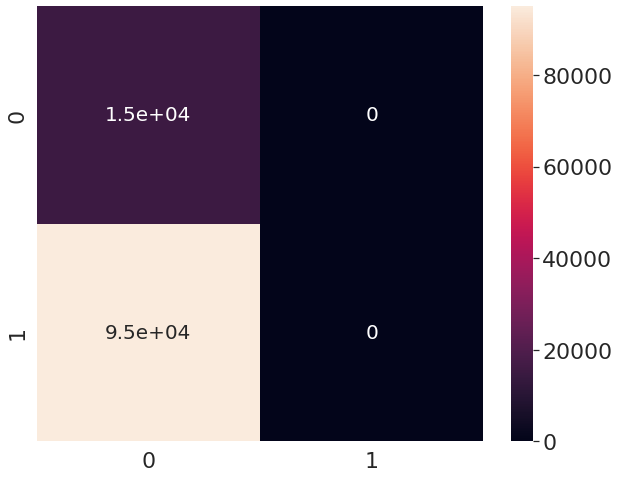

In [50]:
# Testing on gafgyt
classify_test(clf=clf, X_test=X_test_gafgyt, y_test=y_test_gafgyt)

              precision    recall  f1-score   support

           0      0.071     1.000     0.132     10413
           1      0.000     0.000     0.000    136933

    accuracy                          0.071    147346
   macro avg      0.035     0.500     0.066    147346
weighted avg      0.005     0.071     0.009    147346



/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


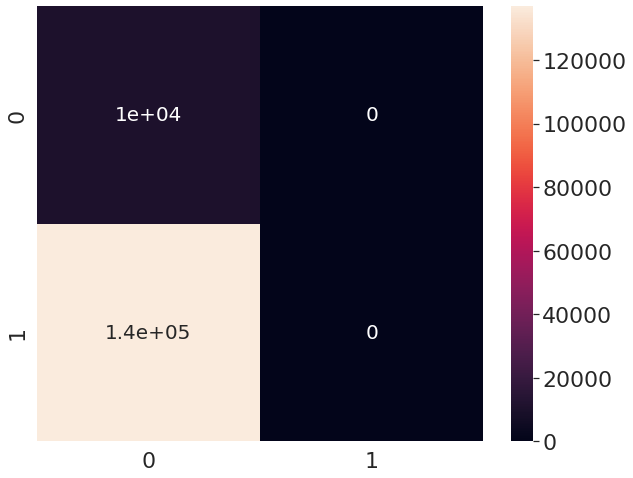

In [51]:
# Testing on Mirai
classify_test(clf=clf, X_test=X_test_mirai, y_test=y_test_mirai)

### Train on Mirai

In [52]:
clf = classify_train(X_train=X_train_mirai_1, y_train=y_train_mirai_1, algo='SOFTMAX')

/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0      0.135     1.000     0.238     14865
           1      0.000     0.000     0.000     94995

    accuracy                          0.135    109860
   macro avg      0.068     0.500     0.119    109860
weighted avg      0.018     0.135     0.032    109860



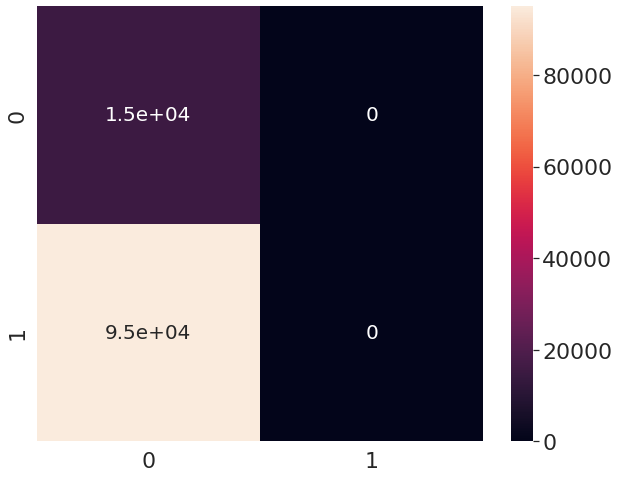

In [53]:
# Testing on gafgyt
classify_test(clf=clf, X_test=X_test_gafgyt, y_test=y_test_gafgyt)

              precision    recall  f1-score   support

           0      0.071     1.000     0.132     10413
           1      0.000     0.000     0.000    136933

    accuracy                          0.071    147346
   macro avg      0.035     0.500     0.066    147346
weighted avg      0.005     0.071     0.009    147346



/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


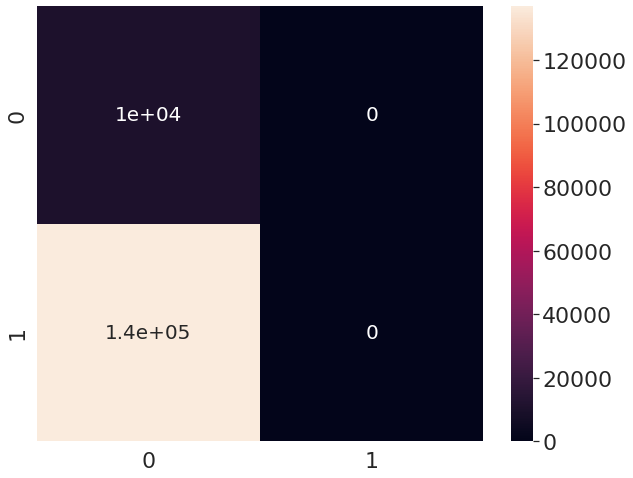

In [54]:
# Testing on Mirai
classify_test(clf=clf, X_test=X_test_mirai, y_test=y_test_mirai)

## 3.4. Random Forest

### Train on Gafgyt

In [55]:
clf = classify_train(X_train=X_train_gafgyt_1, y_train=y_train_gafgyt_1, algo='RF')

              precision    recall  f1-score   support

           0      0.996     1.000     0.998     14865
           1      1.000     0.999     1.000     94995

    accuracy                          0.999    109860
   macro avg      0.998     1.000     0.999    109860
weighted avg      0.999     0.999     0.999    109860



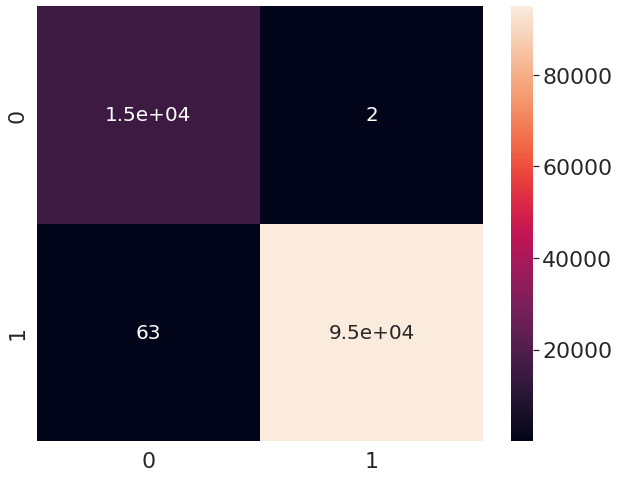

AUC score:  9.996011314844814e-01


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


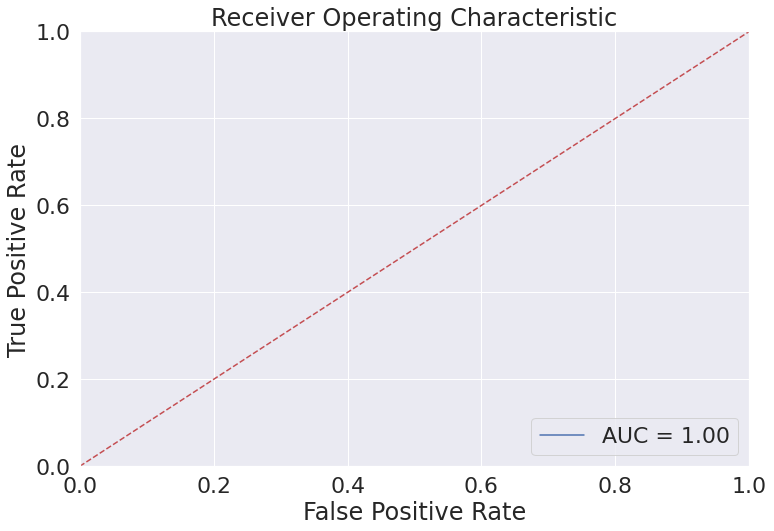

In [56]:
# Testing on gafgyt
classify_test(clf=clf, X_test=X_test_gafgyt, y_test=y_test_gafgyt)

              precision    recall  f1-score   support

           0      0.167     1.000     0.286     10413
           1      1.000     0.619     0.765    136933

    accuracy                          0.646    147346
   macro avg      0.583     0.810     0.525    147346
weighted avg      0.941     0.646     0.731    147346



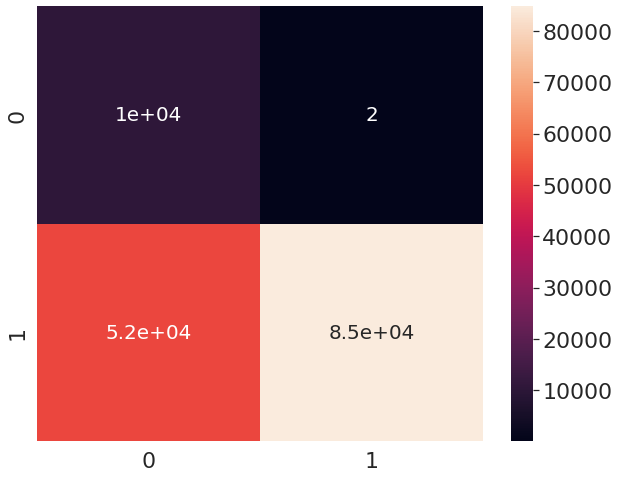

AUC score:  0.8096430356680324


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


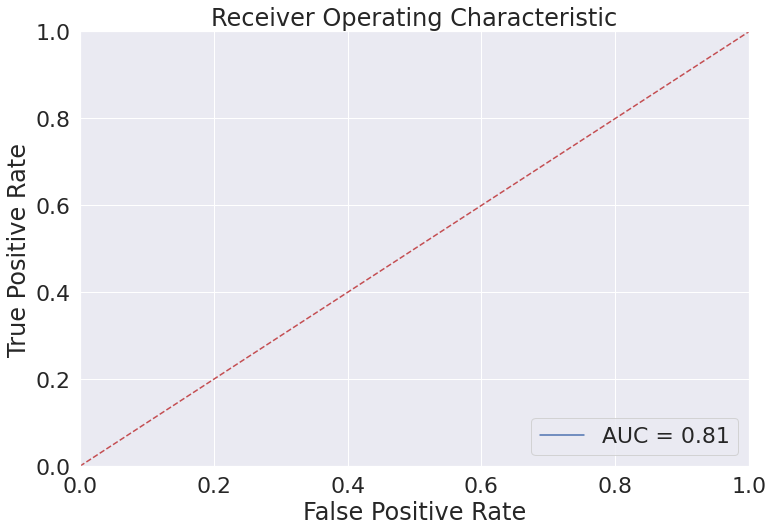

In [57]:
# Testing on Mirai
classify_test(clf=clf, X_test=X_test_mirai, y_test=y_test_mirai)

### Train on Mirai

In [58]:
clf = classify_train(X_train=X_train_mirai_1, y_train=y_train_mirai_1, algo='RF')

              precision    recall  f1-score   support

           0      0.195     1.000     0.327     14865
           1      1.000     0.355     0.524     94995

    accuracy                          0.443    109860
   macro avg      0.598     0.678     0.426    109860
weighted avg      0.891     0.443     0.498    109860



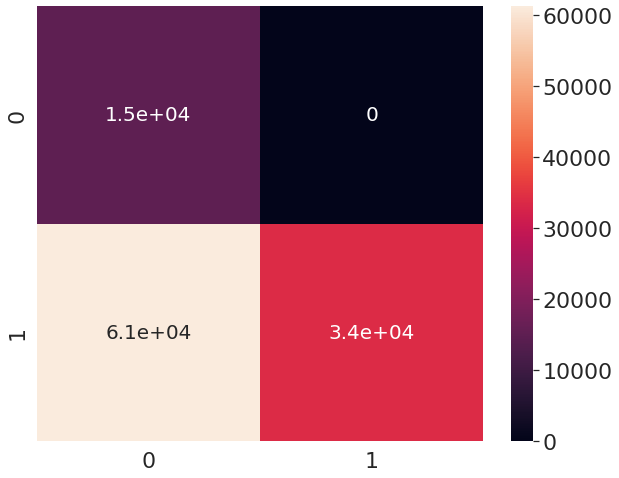

AUC score:  0.6777093531238486


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


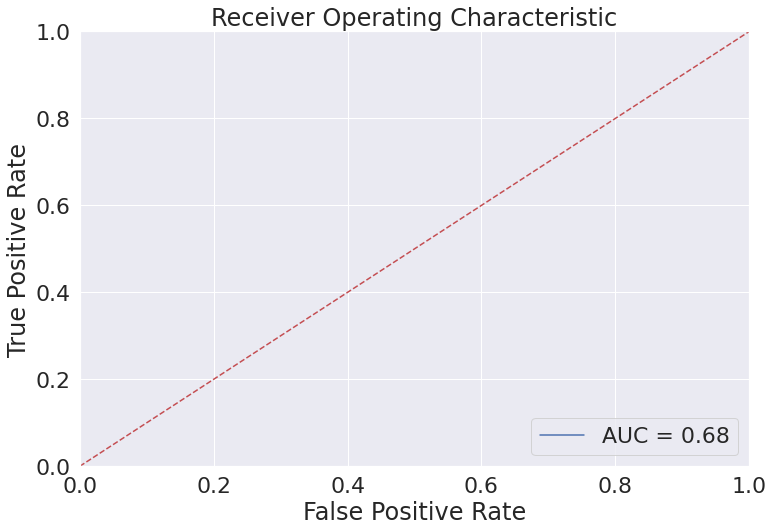

In [59]:
# Testing on gafgyt
classify_test(clf=clf, X_test=X_test_gafgyt, y_test=y_test_gafgyt)

              precision    recall  f1-score   support

           0      0.998     1.000     0.999     10413
           1      1.000     1.000     1.000    136933

    accuracy                          1.000    147346
   macro avg      0.999     1.000     1.000    147346
weighted avg      1.000     1.000     1.000    147346



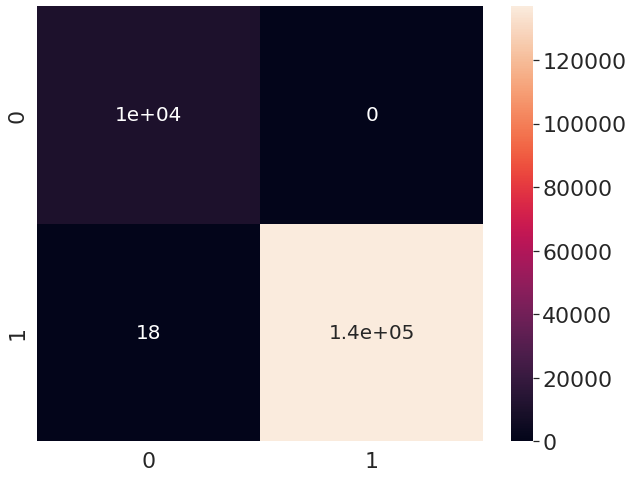

AUC score:  0.9999342744261792


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


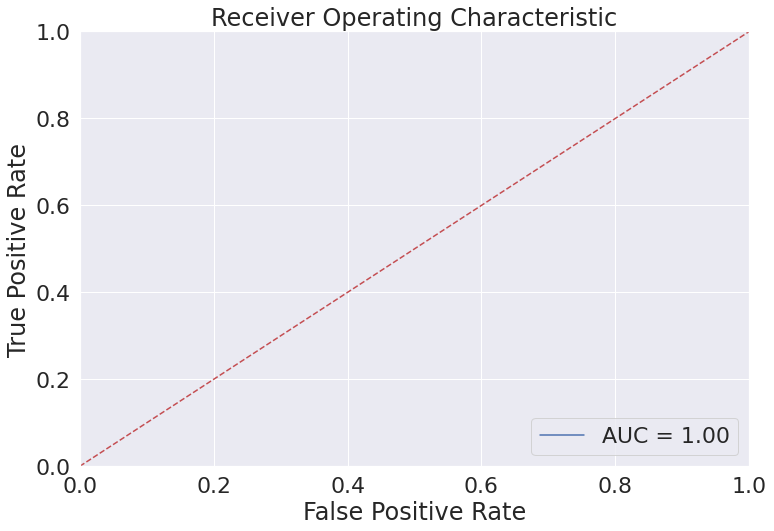

In [60]:
# Testing on Mirai
classify_test(clf=clf, X_test=X_test_mirai, y_test=y_test_mirai)

## 3.5. Decision Tree

### Train on Gafgyt

In [61]:
clf = classify_train(X_train=X_train_gafgyt_1, y_train=y_train_gafgyt_1, algo='DT')

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     14865
           1      1.000     1.000     1.000     94995

    accuracy                          1.000    109860
   macro avg      1.000     1.000     1.000    109860
weighted avg      1.000     1.000     1.000    109860



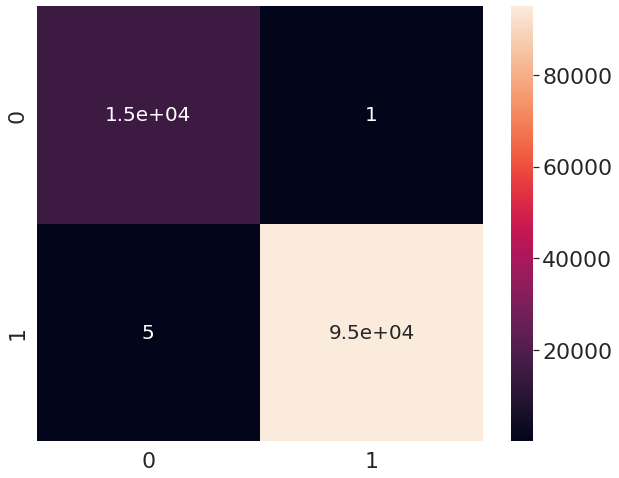

AUC score:  0.9999400467675579


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


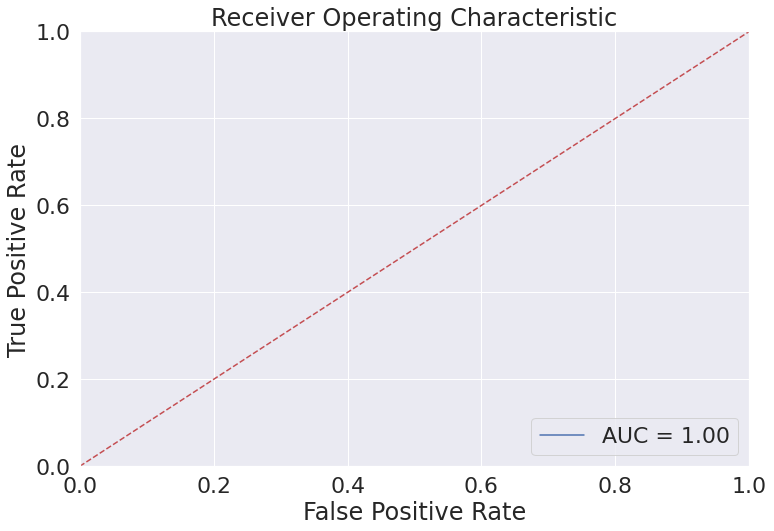

In [62]:
# Testing on gafgyt
classify_test(clf=clf, X_test=X_test_gafgyt, y_test=y_test_gafgyt)

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     10413
           1      1.000     1.000     1.000    136933

    accuracy                          1.000    147346
   macro avg      1.000     1.000     1.000    147346
weighted avg      1.000     1.000     1.000    147346



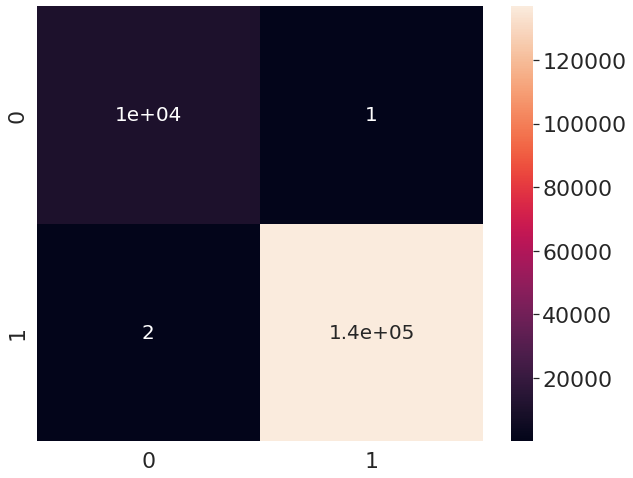

AUC score:  0.9999446802565148


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


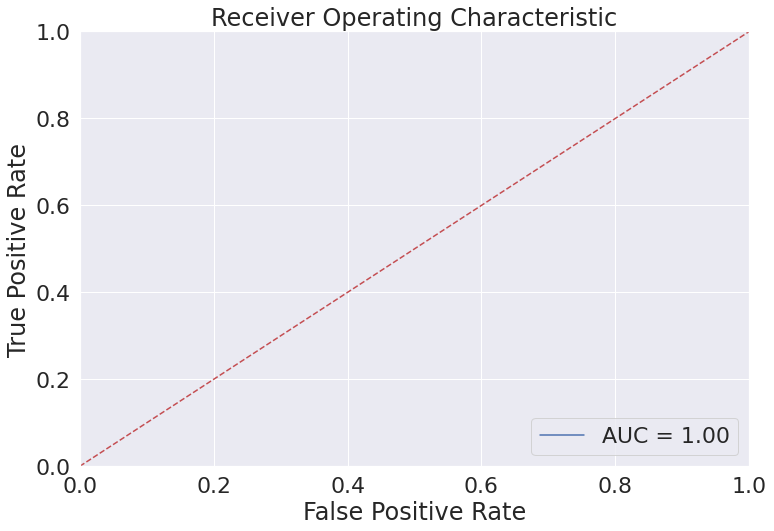

In [63]:
# Testing on Mirai
classify_test(clf=clf, X_test=X_test_mirai, y_test=y_test_mirai)

### Train on Mirai

In [64]:
clf = classify_train(X_train=X_train_mirai_1, y_train=y_train_mirai_1, algo='DT')

              precision    recall  f1-score   support

           0      0.199     1.000     0.332     14865
           1      1.000     0.370     0.540     94995

    accuracy                          0.455    109860
   macro avg      0.599     0.685     0.436    109860
weighted avg      0.892     0.455     0.512    109860



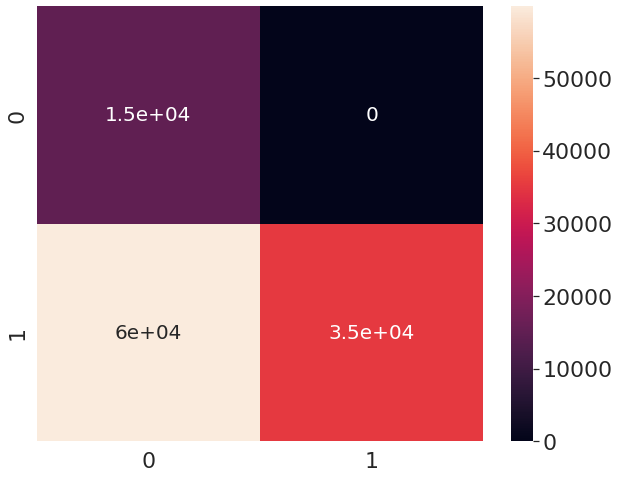

AUC score:  0.6849518395705037


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


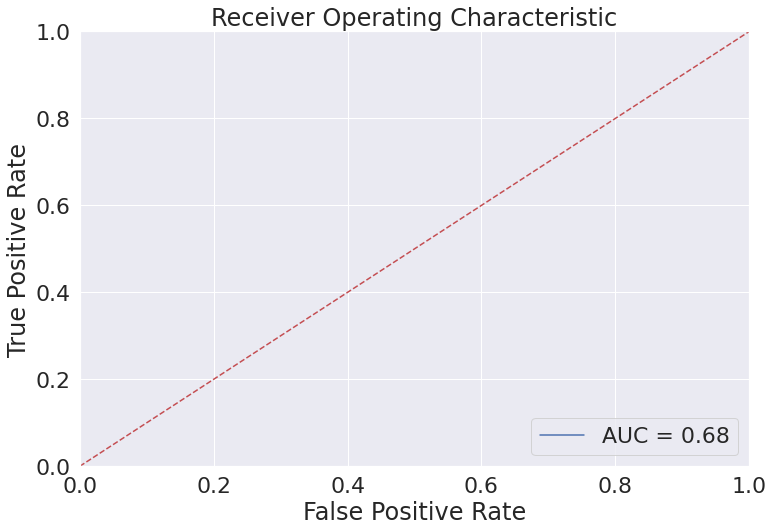

In [65]:
# Testing on gafgyt
classify_test(clf=clf, X_test=X_test_gafgyt, y_test=y_test_gafgyt)

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     10413
           1      1.000     1.000     1.000    136933

    accuracy                          1.000    147346
   macro avg      1.000     1.000     1.000    147346
weighted avg      1.000     1.000     1.000    147346



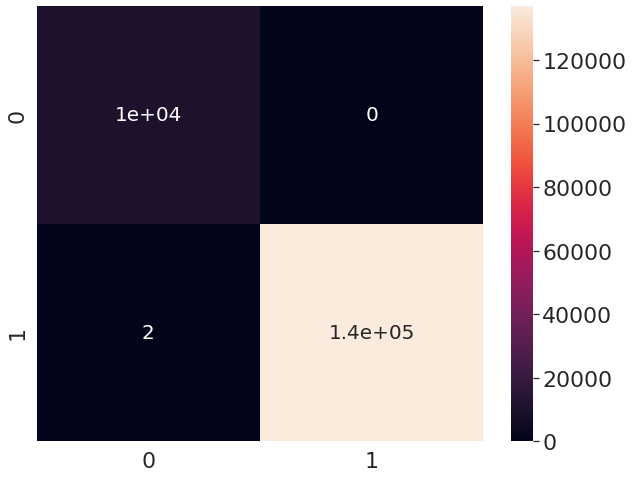

AUC score:  0.9999926971584643


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


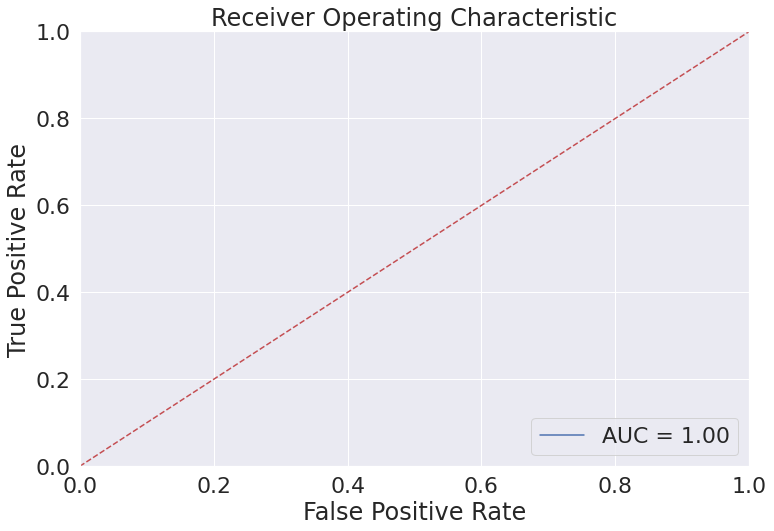

In [66]:
# Testing on Mirai
classify_test(clf=clf, X_test=X_test_mirai, y_test=y_test_mirai)

## 3.6. XGB

### Train on Gafgyt

In [67]:
clf = classify_train(X_train=X_train_gafgyt_1, y_train=y_train_gafgyt_1, algo='XGB')

              precision    recall  f1-score   support

           0      0.999     1.000     1.000     14865
           1      1.000     1.000     1.000     94995

    accuracy                          1.000    109860
   macro avg      1.000     1.000     1.000    109860
weighted avg      1.000     1.000     1.000    109860



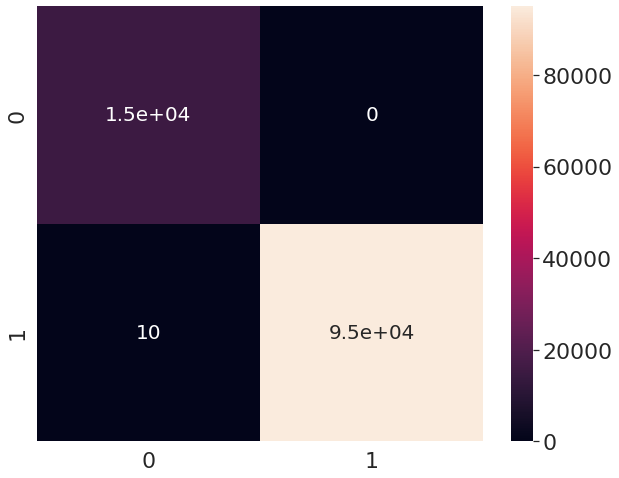

AUC score:  0.9999473656508238


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


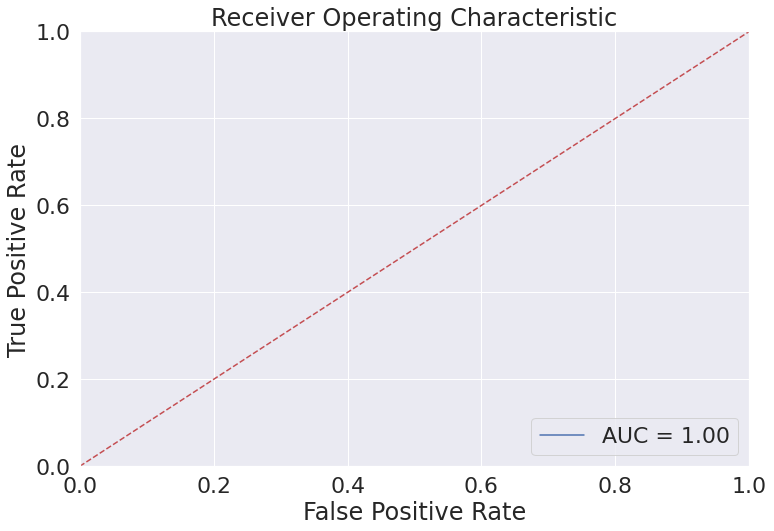

In [68]:
# Testing on gafgyt
classify_test(clf=clf, X_test=X_test_gafgyt, y_test=y_test_gafgyt)

              precision    recall  f1-score   support

           0      0.998     1.000     0.999     10413
           1      1.000     1.000     1.000    136933

    accuracy                          1.000    147346
   macro avg      0.999     1.000     1.000    147346
weighted avg      1.000     1.000     1.000    147346



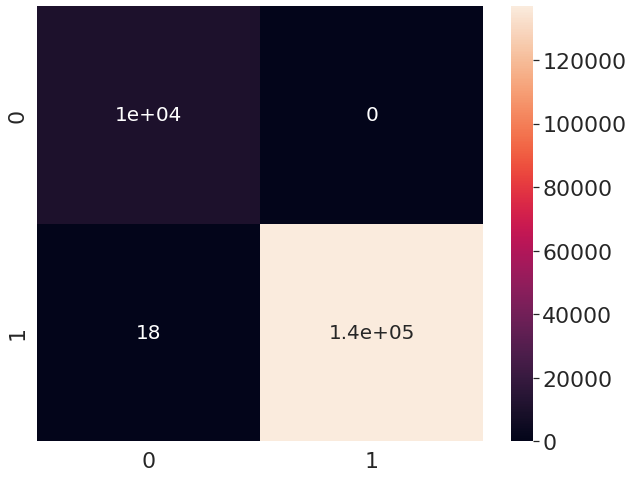

AUC score:  0.9999342744261792


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


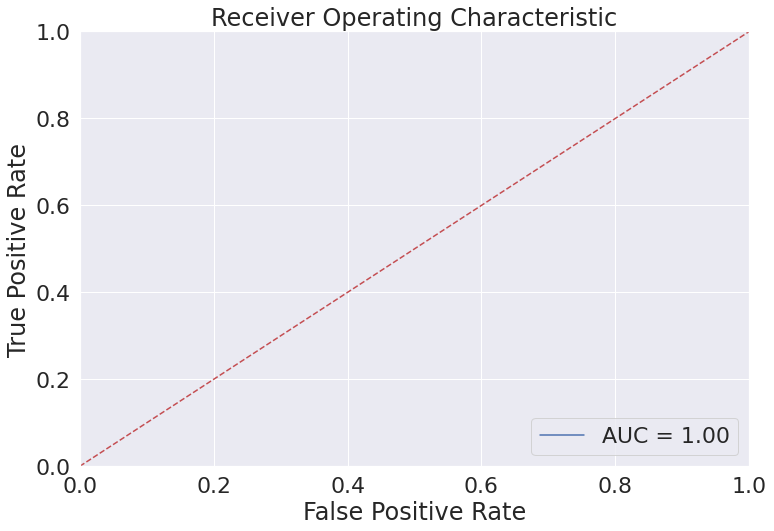

In [69]:
# Testing on Mirai
classify_test(clf=clf, X_test=X_test_mirai, y_test=y_test_mirai)

### Train on Mirai

In [70]:
clf = classify_train(X_train=X_train_mirai_1, y_train=y_train_mirai_1, algo='XGB')

              precision    recall  f1-score   support

           0      0.200     1.000     0.333     14865
           1      1.000     0.373     0.543     94995

    accuracy                          0.457    109860
   macro avg      0.600     0.686     0.438    109860
weighted avg      0.892     0.457     0.514    109860



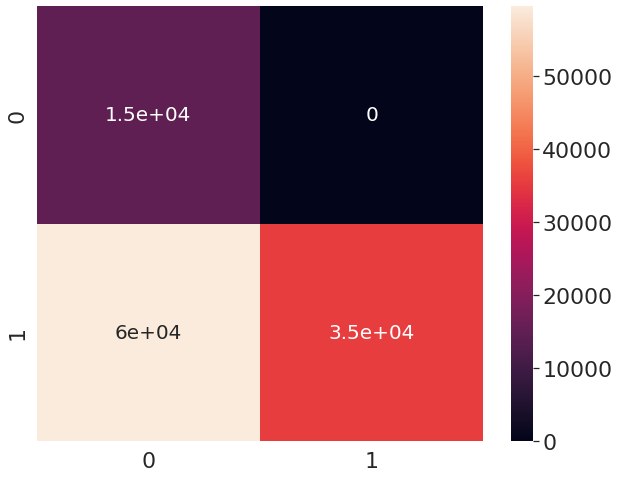

AUC score:  0.6862992789094162


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


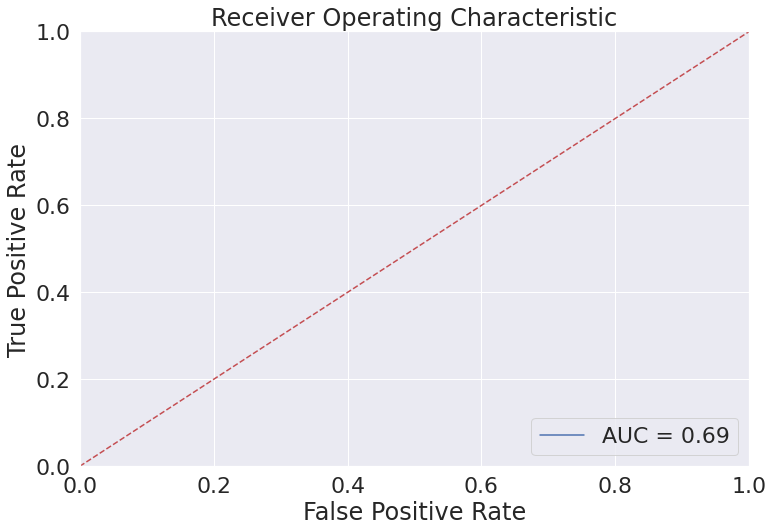

In [71]:
# Testing on gafgyt
classify_test(clf=clf, X_test=X_test_gafgyt, y_test=y_test_gafgyt)

              precision    recall  f1-score   support

           0      0.999     1.000     1.000     10413
           1      1.000     1.000     1.000    136933

    accuracy                          1.000    147346
   macro avg      1.000     1.000     1.000    147346
weighted avg      1.000     1.000     1.000    147346



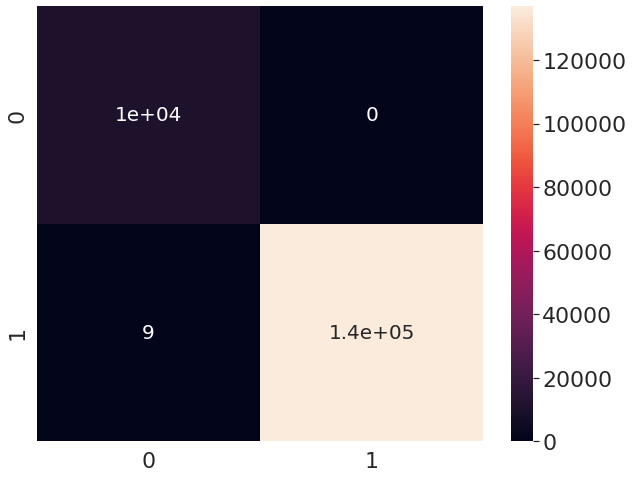

AUC score:  0.9999671372130896


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


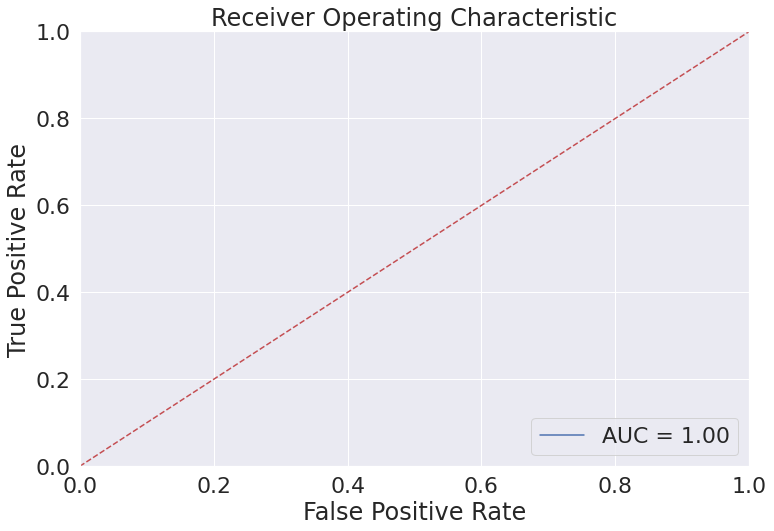

In [72]:
# Testing on Mirai
classify_test(clf=clf, X_test=X_test_mirai, y_test=y_test_mirai)